In [2]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define paths
BASE_DIR = '/project/cc-20250120231604/ssd/users/kwsu/research/dsllm/dsllm/data'

# Ground truth data paths (100DS)
HIGH_RES_DIR = os.path.join(BASE_DIR, 'stage_2_compare_buffer/300seconds_100DS/test')
HIGH_RES_DATA = os.path.join(HIGH_RES_DIR, 'capture24_test_data_stage2_300seconds_100DS.pkl')
HIGH_RES_LABELS = os.path.join(HIGH_RES_DIR, 'capture24_test_labels_stage2_300seconds_100DS.pkl')

# SAITS predicted data paths
PRED_DIR = os.path.join(BASE_DIR, 'stage_2_upsampled_saits/300seconds_100DS_upsampled_from_1000DS/test')
PRED_DATA = os.path.join(PRED_DIR, 'capture24_test_data_stage2_300seconds_100DS_saits.pkl')

# Activity class mapping
ACTIVITY_CLASSES = {
    1: 'sleep',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'bicycling',
    6: 'vehicle',
    7: 'household-chores',
    8: 'manual-work',
    9: 'sports',
    10: 'mixed-activity'
}


In [3]:
# Load data
def load_data():
    # Load ground truth high-res data
    with open(HIGH_RES_DATA, 'rb') as f:
        high_res_data = pickle.load(f)
    high_res_data = np.array(high_res_data)
    
    # Load SAITS predictions
    with open(PRED_DATA, 'rb') as f:
        pred_data = pickle.load(f)
    pred_data = np.array(pred_data)
    
    # Load labels
    with open(HIGH_RES_LABELS, 'rb') as f:
        labels = pickle.load(f)
    
    # Quick validation
    print("\nValidation:")
    print("Are arrays identical?", np.array_equal(high_res_data, pred_data))
    print("Max absolute difference:", np.max(np.abs(high_res_data - pred_data)))
    print("Sample differences (first 5):")
    for i in range(5):
        diff = np.mean(np.abs(high_res_data[i] - pred_data[i]))
        print(f"Sample {i}: Mean absolute difference = {diff:.6f}")
    
    return high_res_data, pred_data, labels

# Load all data
high_res_data, pred_data, test_labels = load_data()
print(f"Ground truth data shape: {high_res_data.shape}")
print(f"Predicted data shape: {pred_data.shape}")
print(f"Number of test labels: {len(test_labels)}")

# Extract activity categories from label dictionaries
activity_categories = np.array([label['activity_category'] for label in test_labels])

# Display class distribution
unique_classes, counts = np.unique(activity_categories, return_counts=True)
print("\nClass distribution:")
for cls, count in zip(unique_classes, counts):
    print(f"Activity Category {cls} ({ACTIVITY_CLASSES[cls]}): {count} samples")



Validation:
Are arrays identical? False
Max absolute difference: 8.582400595947266
Sample differences (first 5):
Sample 0: Mean absolute difference = 0.029964
Sample 1: Mean absolute difference = 0.030113
Sample 2: Mean absolute difference = 0.062448
Sample 3: Mean absolute difference = 0.059213
Sample 4: Mean absolute difference = 0.020724
Ground truth data shape: (9704, 300, 3)
Predicted data shape: (9704, 300, 3)
Number of test labels: 9704

Class distribution:
Activity Category 1 (sleep): 3946 samples
Activity Category 2 (sitting): 3121 samples
Activity Category 3 (standing): 285 samples
Activity Category 4 (walking): 445 samples
Activity Category 5 (bicycling): 138 samples
Activity Category 6 (vehicle): 231 samples
Activity Category 7 (household-chores): 741 samples
Activity Category 8 (manual-work): 247 samples
Activity Category 9 (sports): 46 samples
Activity Category 10 (mixed-activity): 504 samples


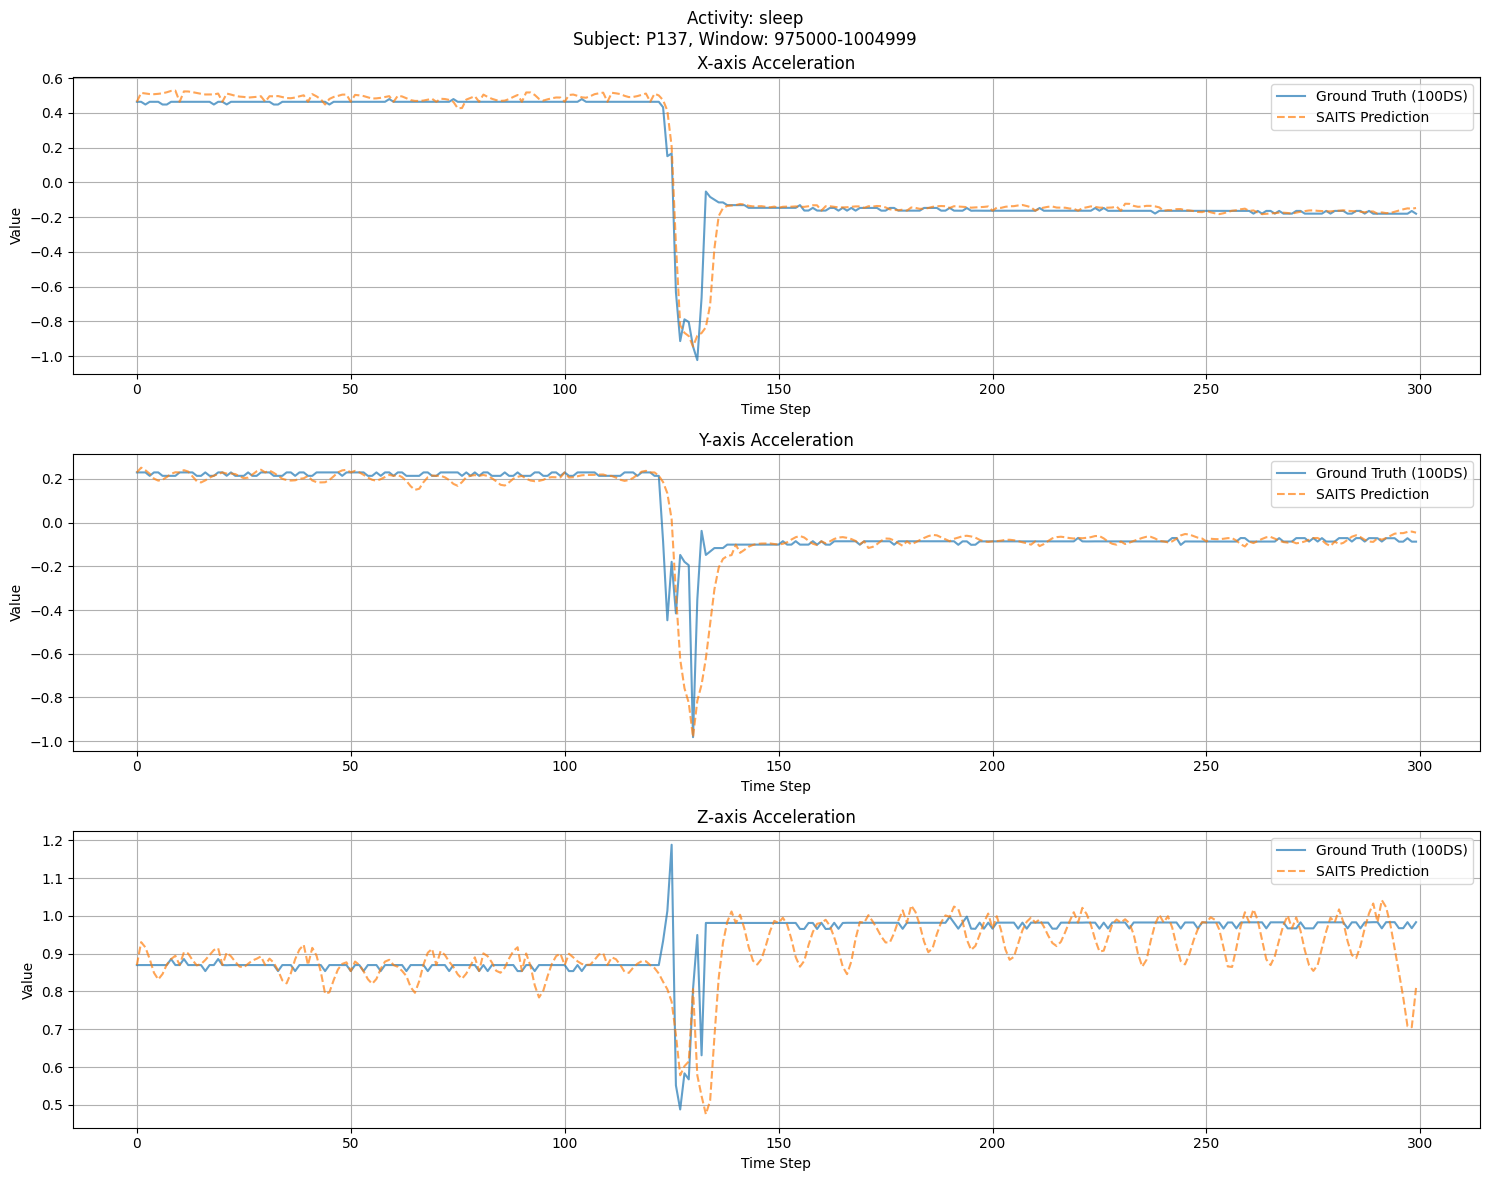


Sample 6794 metrics:
Activity: sleep
Subject: P137
MSE: 0.0065
MAE: 0.0345


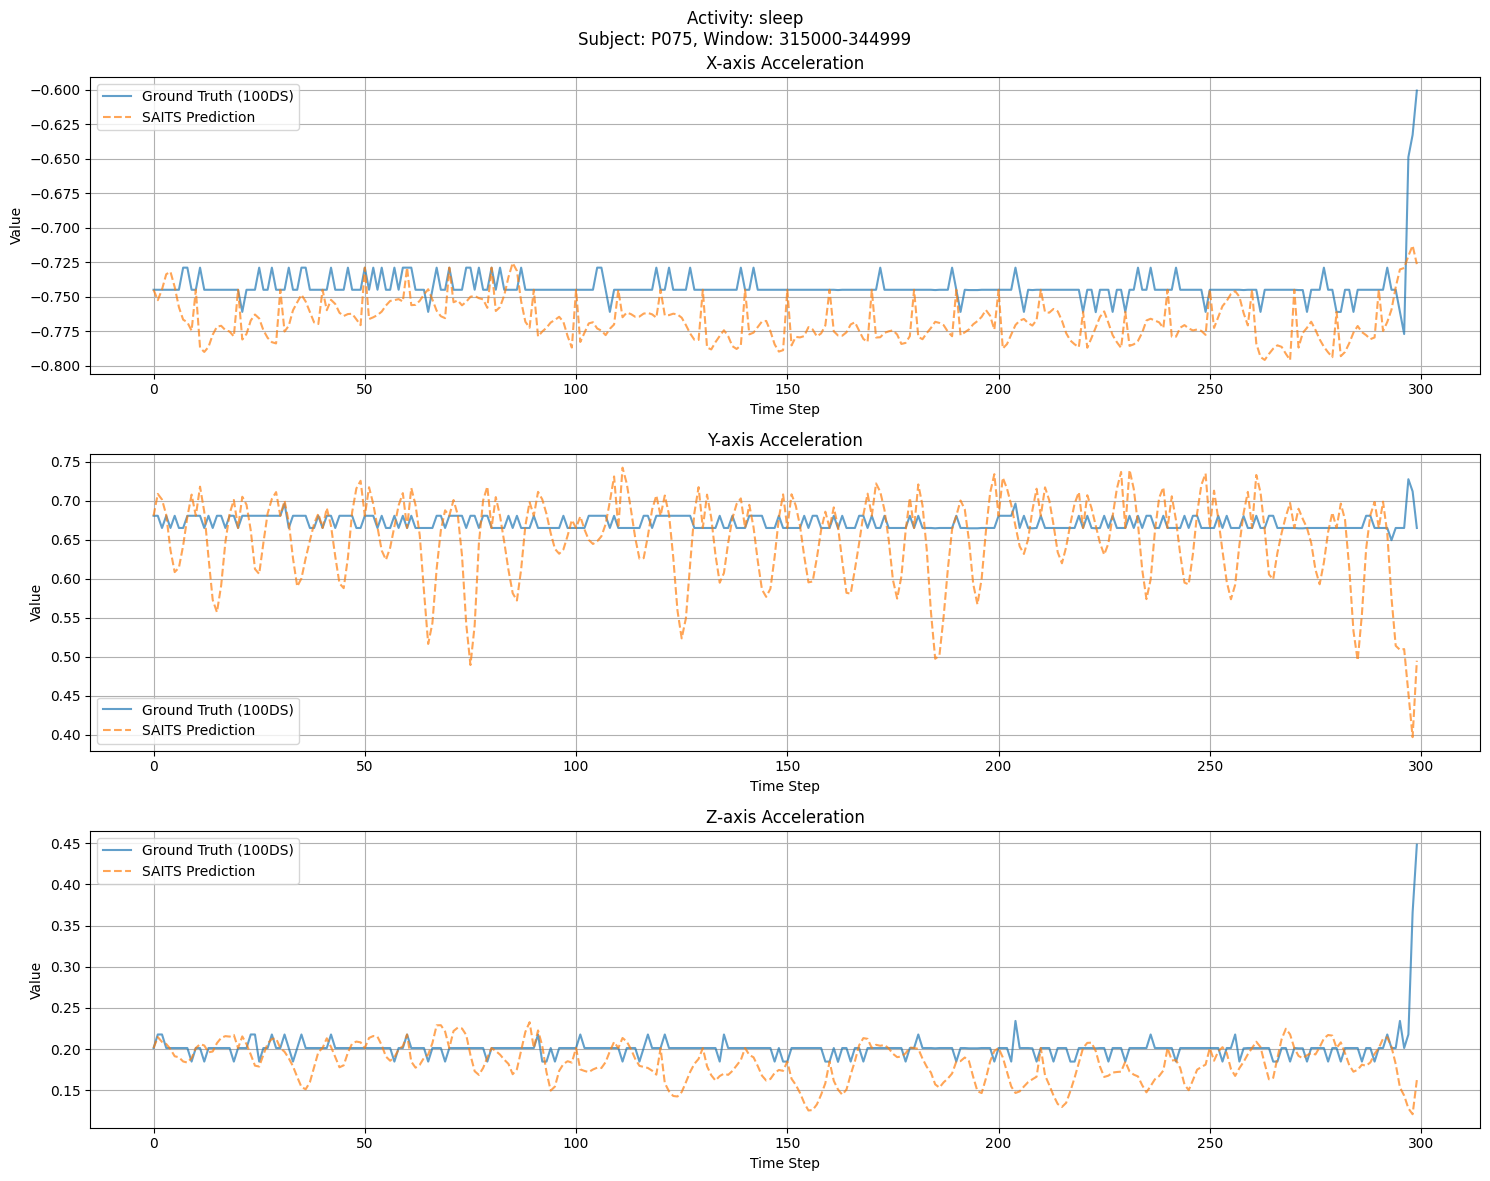


Sample 2636 metrics:
Activity: sleep
Subject: P075
MSE: 0.0019
MAE: 0.0301


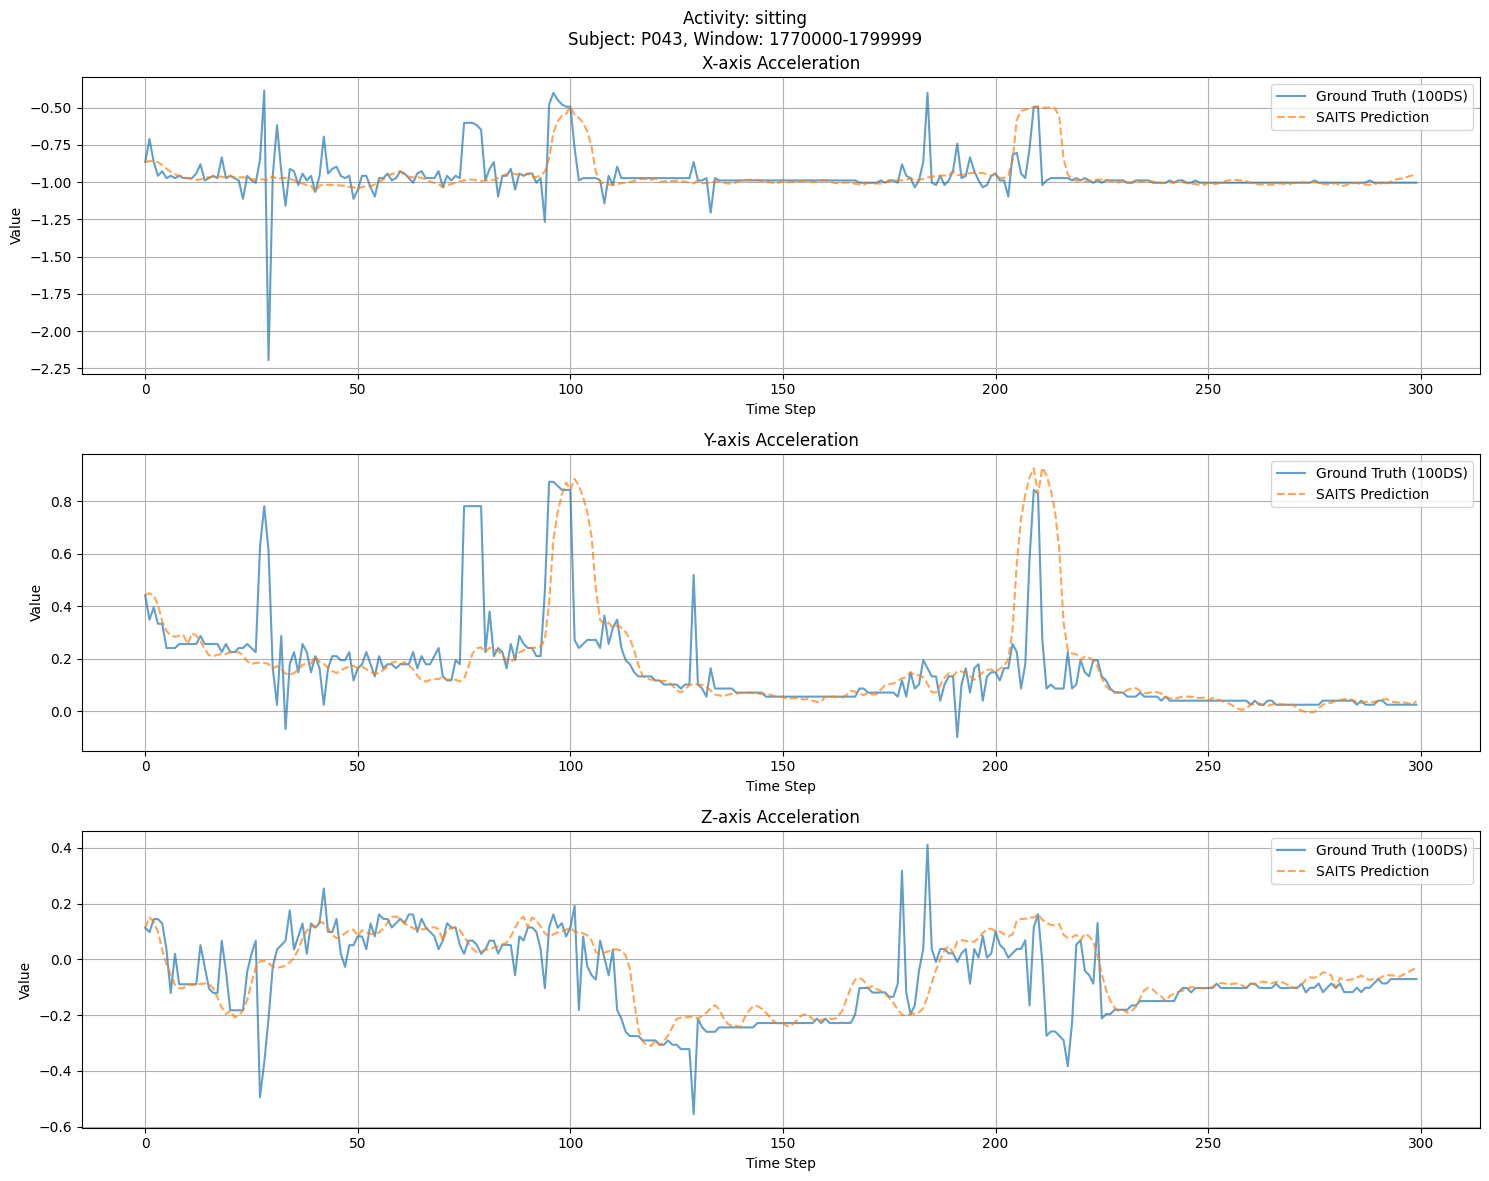


Sample 1437 metrics:
Activity: sitting
Subject: P043
MSE: 0.0202
MAE: 0.0656


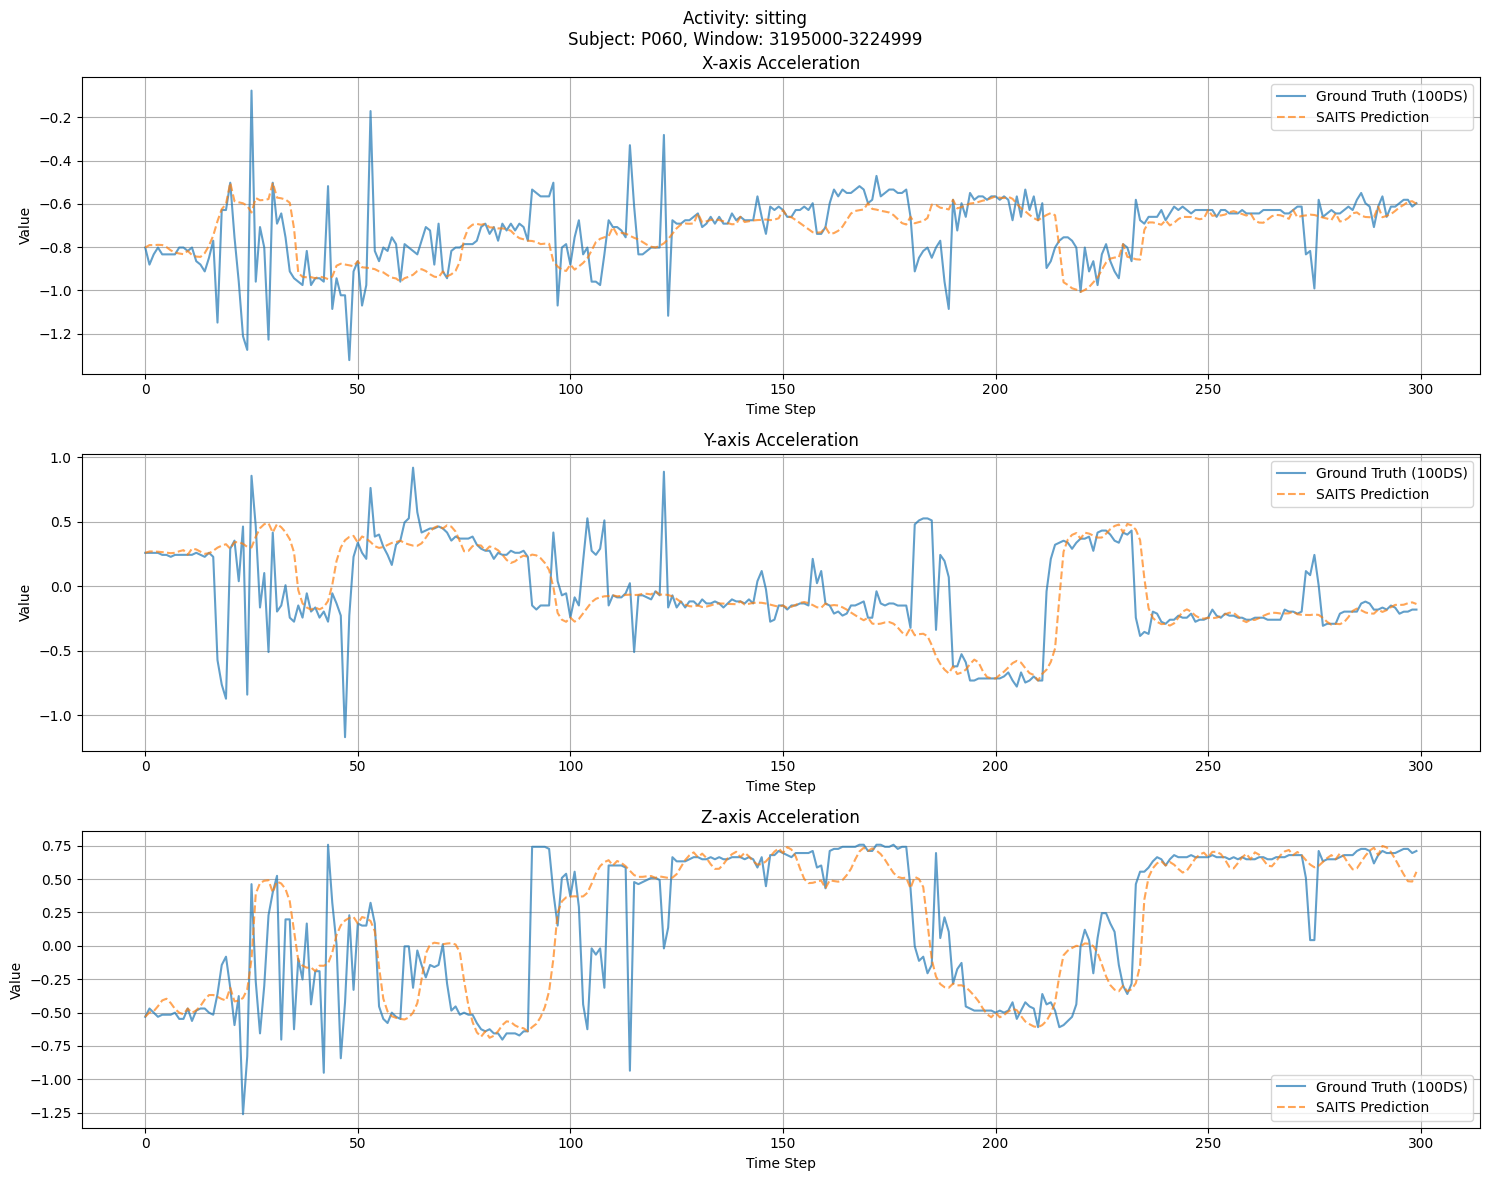


Sample 8683 metrics:
Activity: sitting
Subject: P060
MSE: 0.0742
MAE: 0.1463


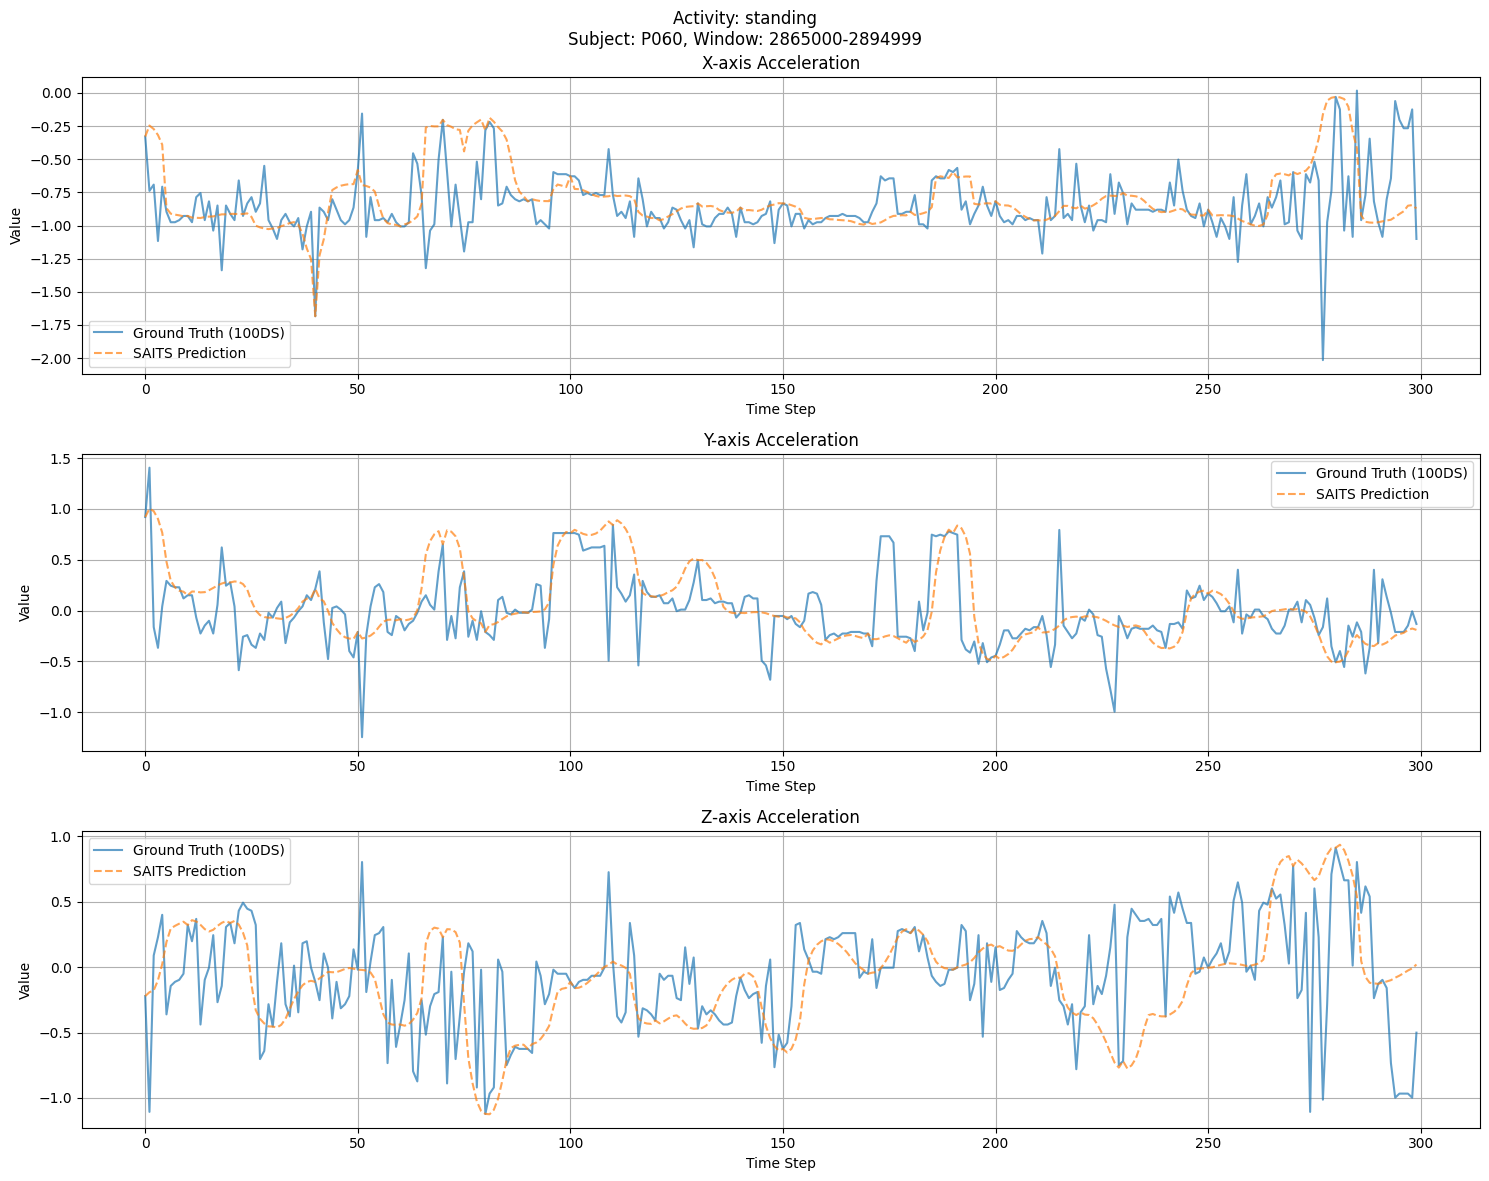


Sample 8661 metrics:
Activity: standing
Subject: P060
MSE: 0.1296
MAE: 0.2274


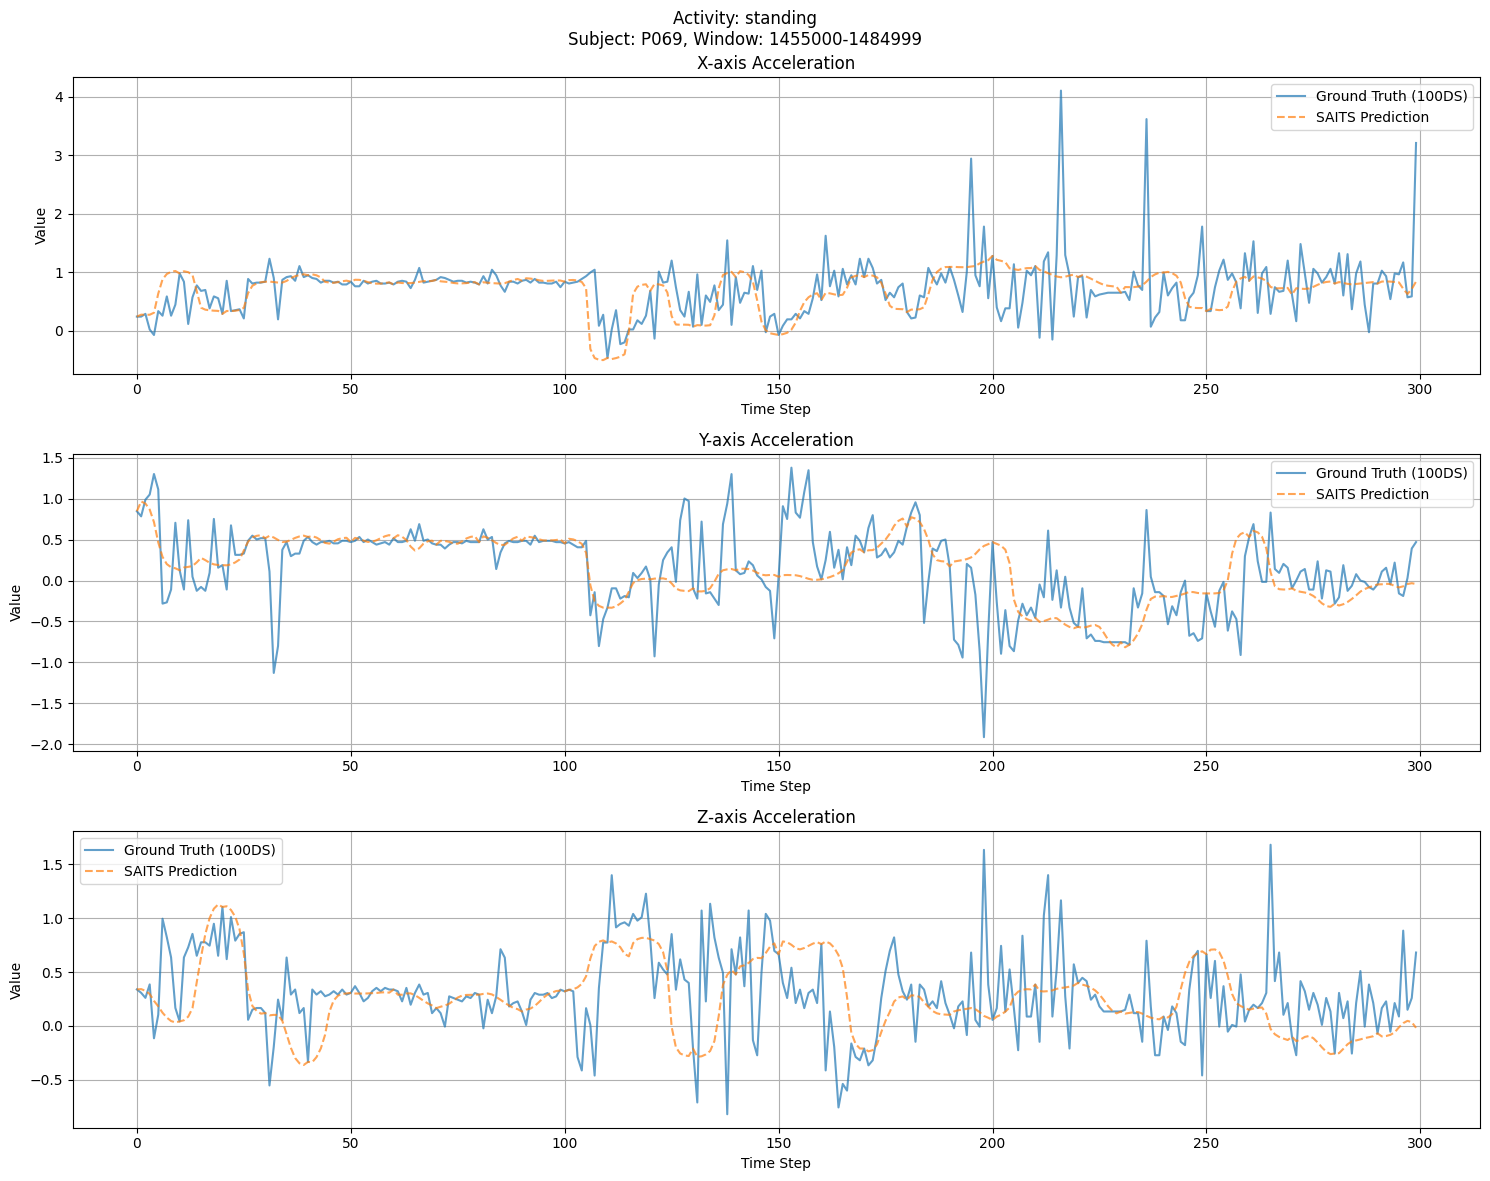


Sample 1842 metrics:
Activity: standing
Subject: P069
MSE: 0.2015
MAE: 0.2775


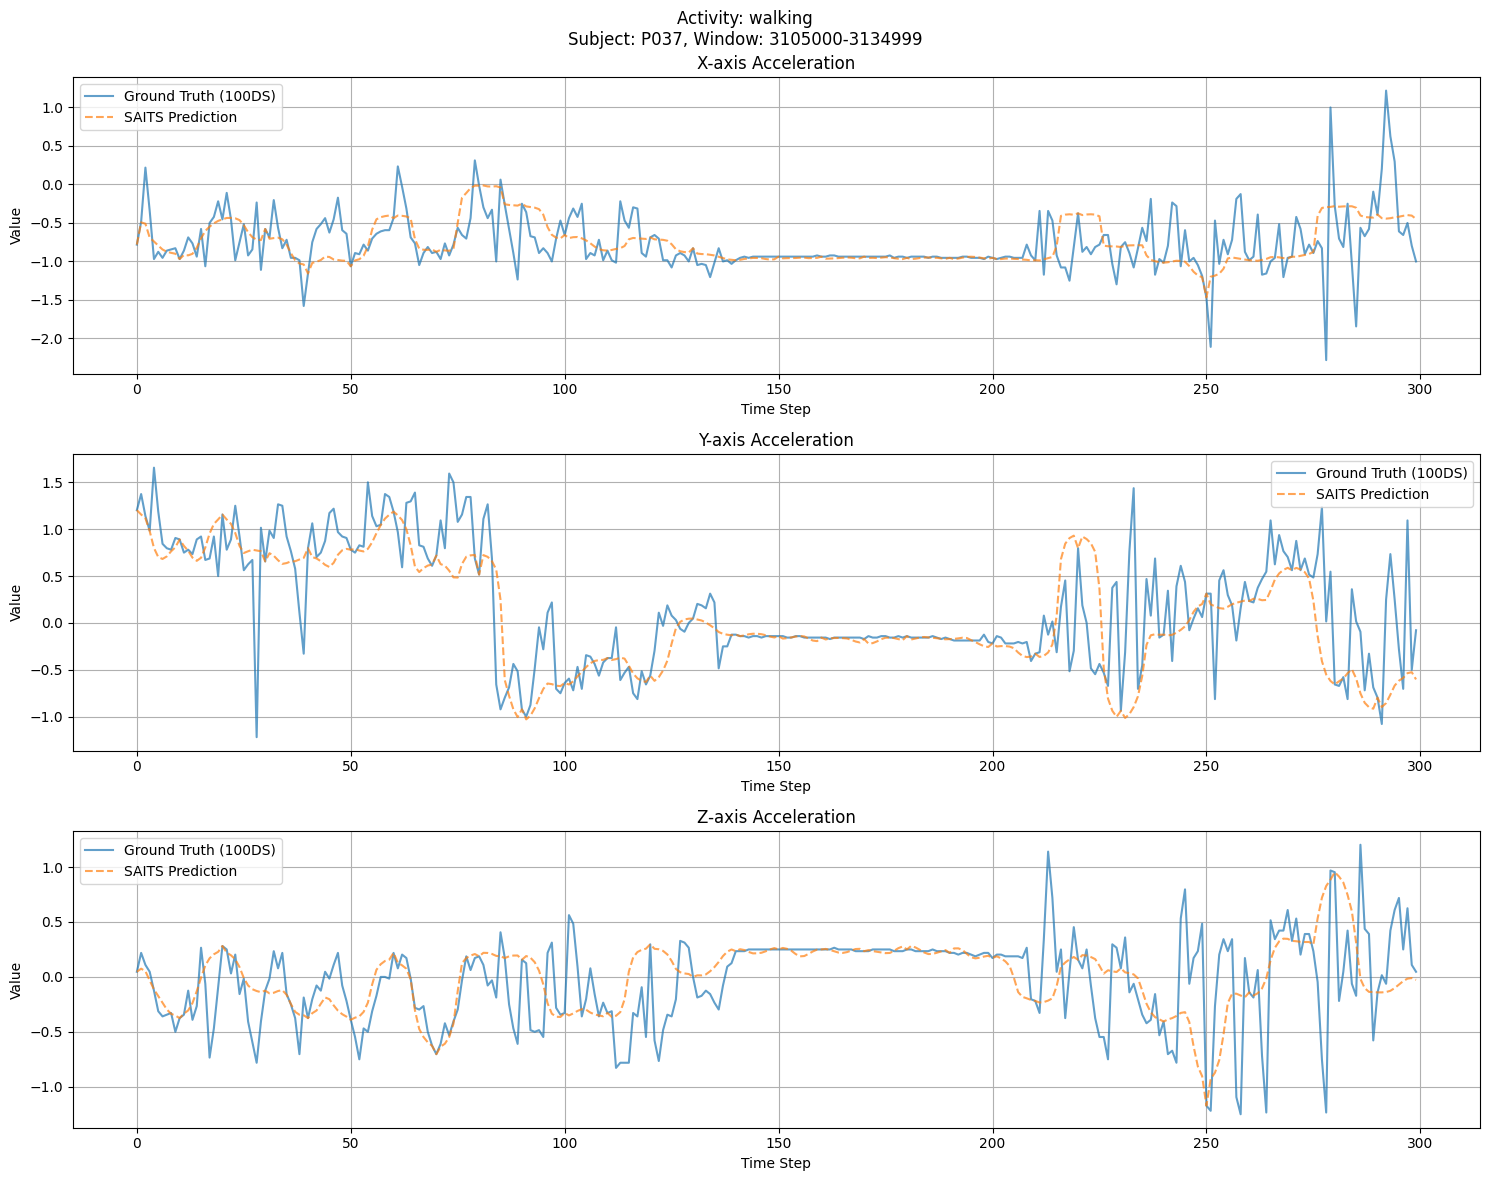


Sample 7755 metrics:
Activity: walking
Subject: P037
MSE: 0.1698
MAE: 0.2469


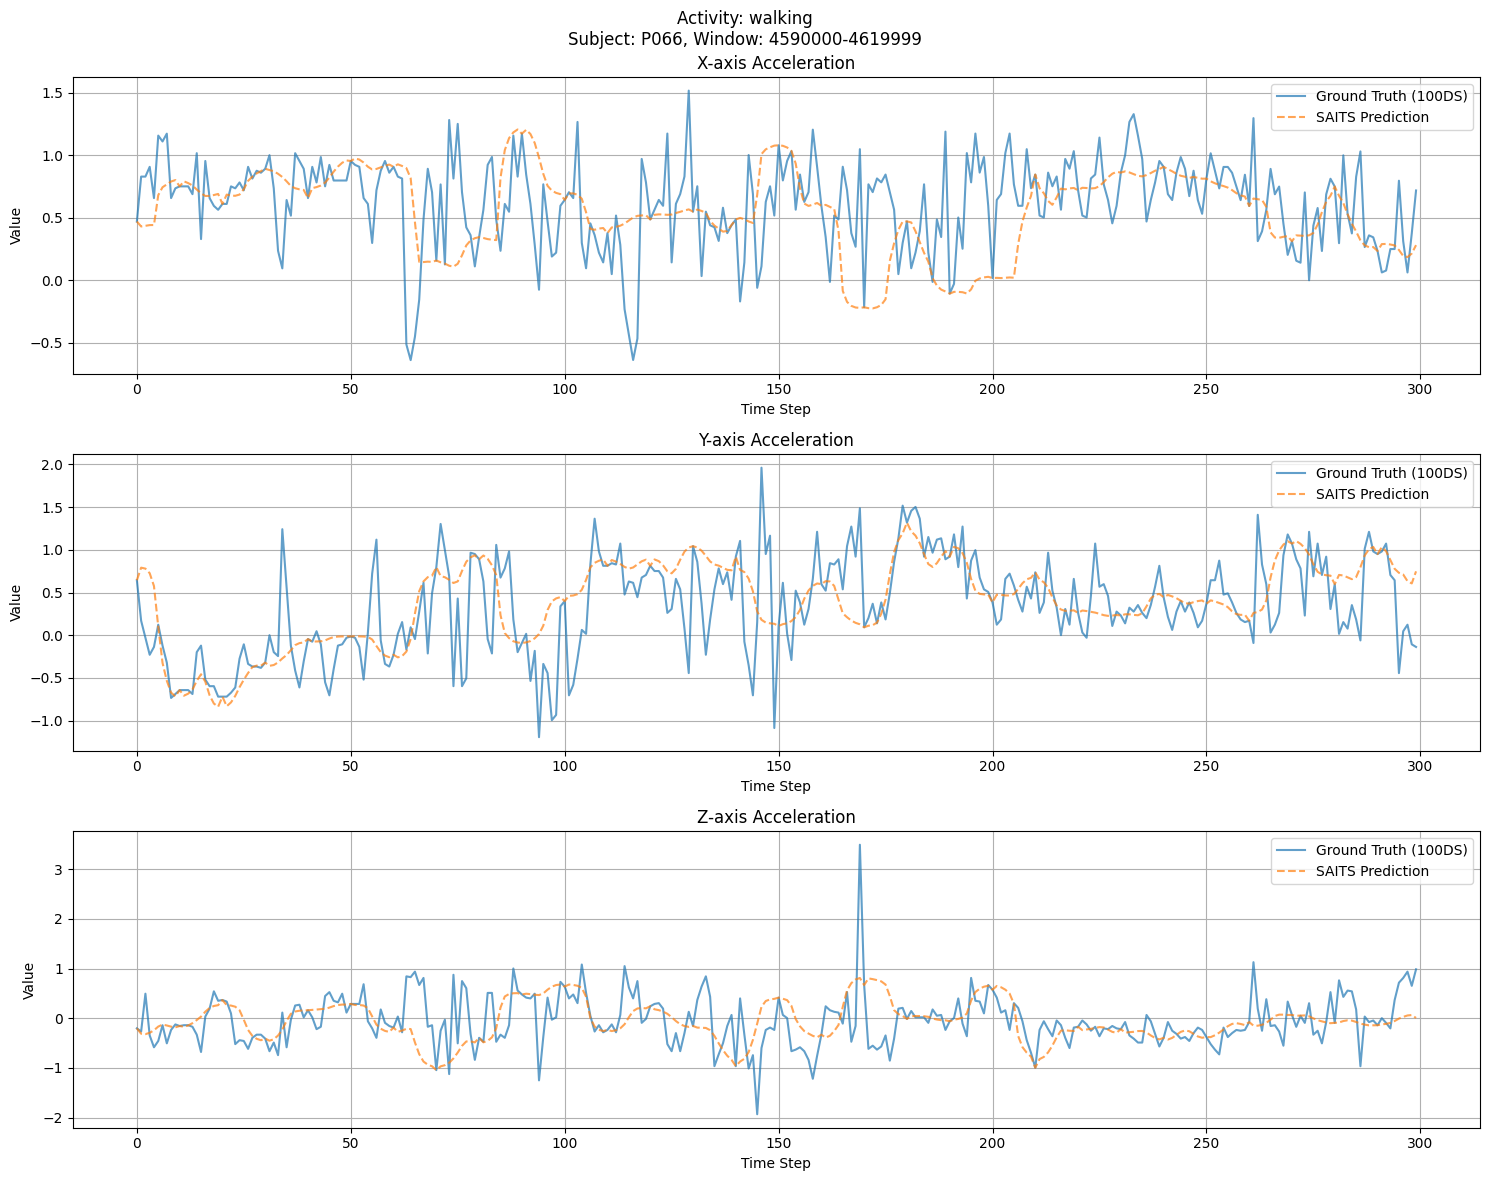


Sample 2400 metrics:
Activity: walking
Subject: P066
MSE: 0.2320
MAE: 0.3250


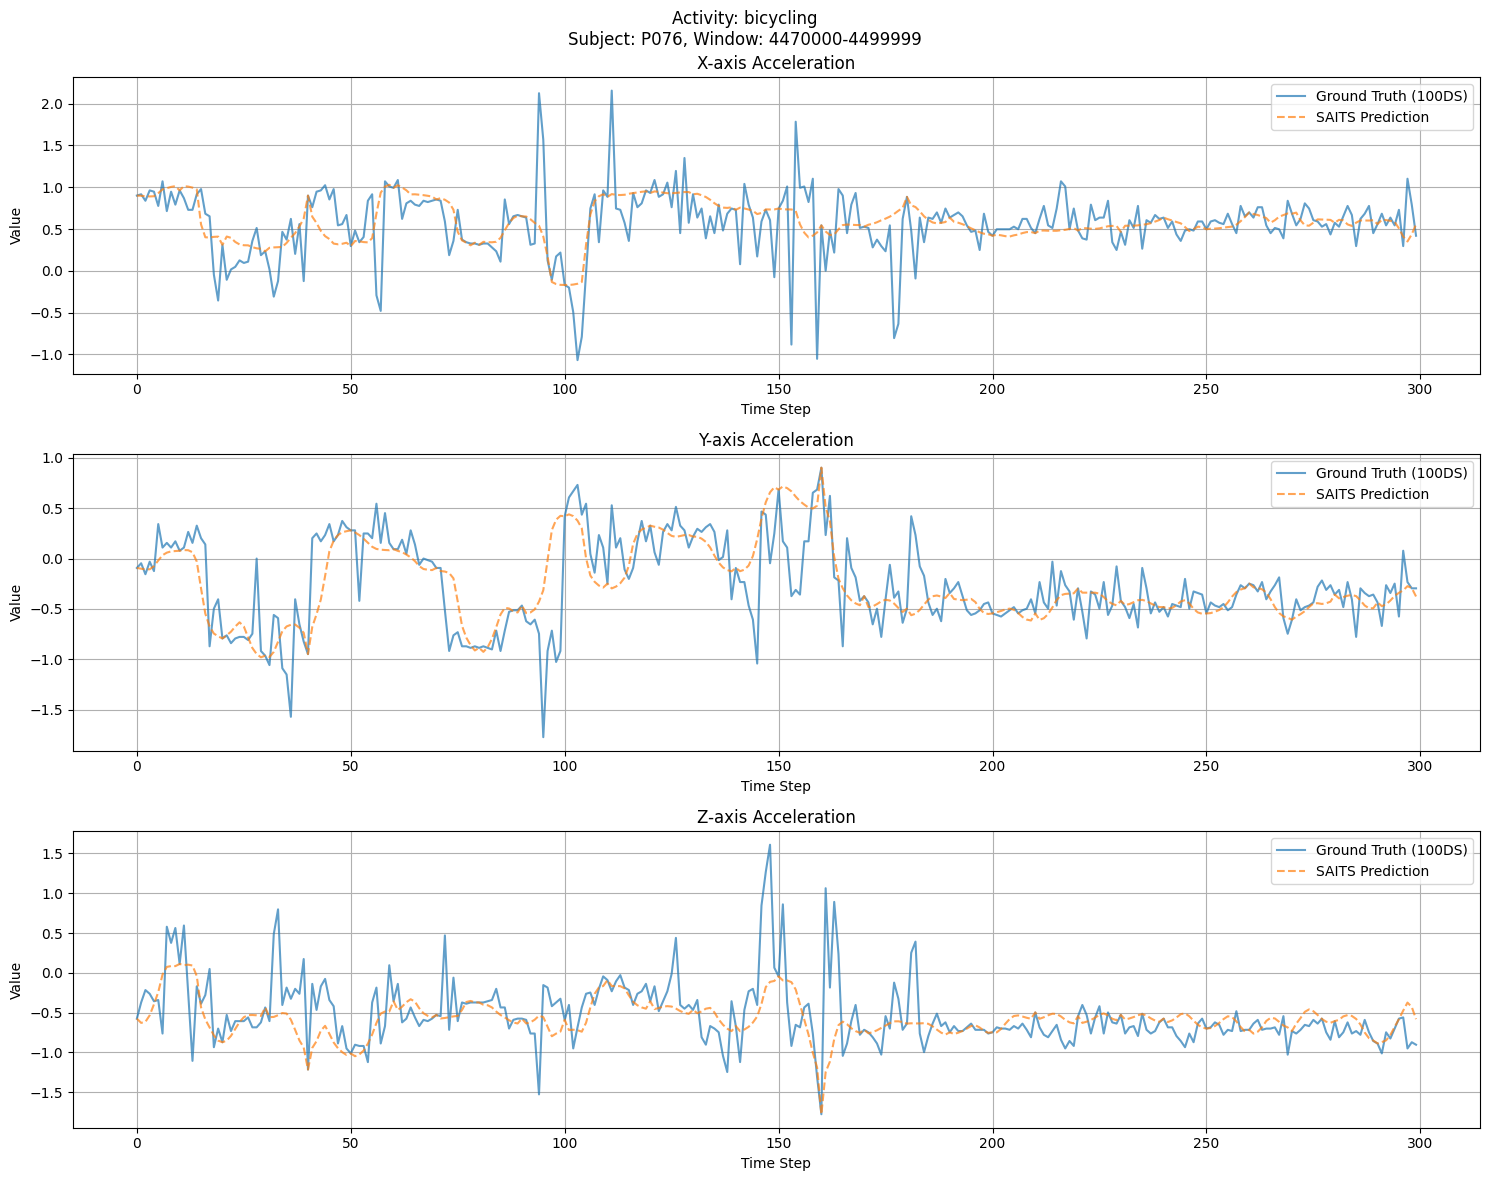


Sample 5689 metrics:
Activity: bicycling
Subject: P076
MSE: 0.1247
MAE: 0.2153


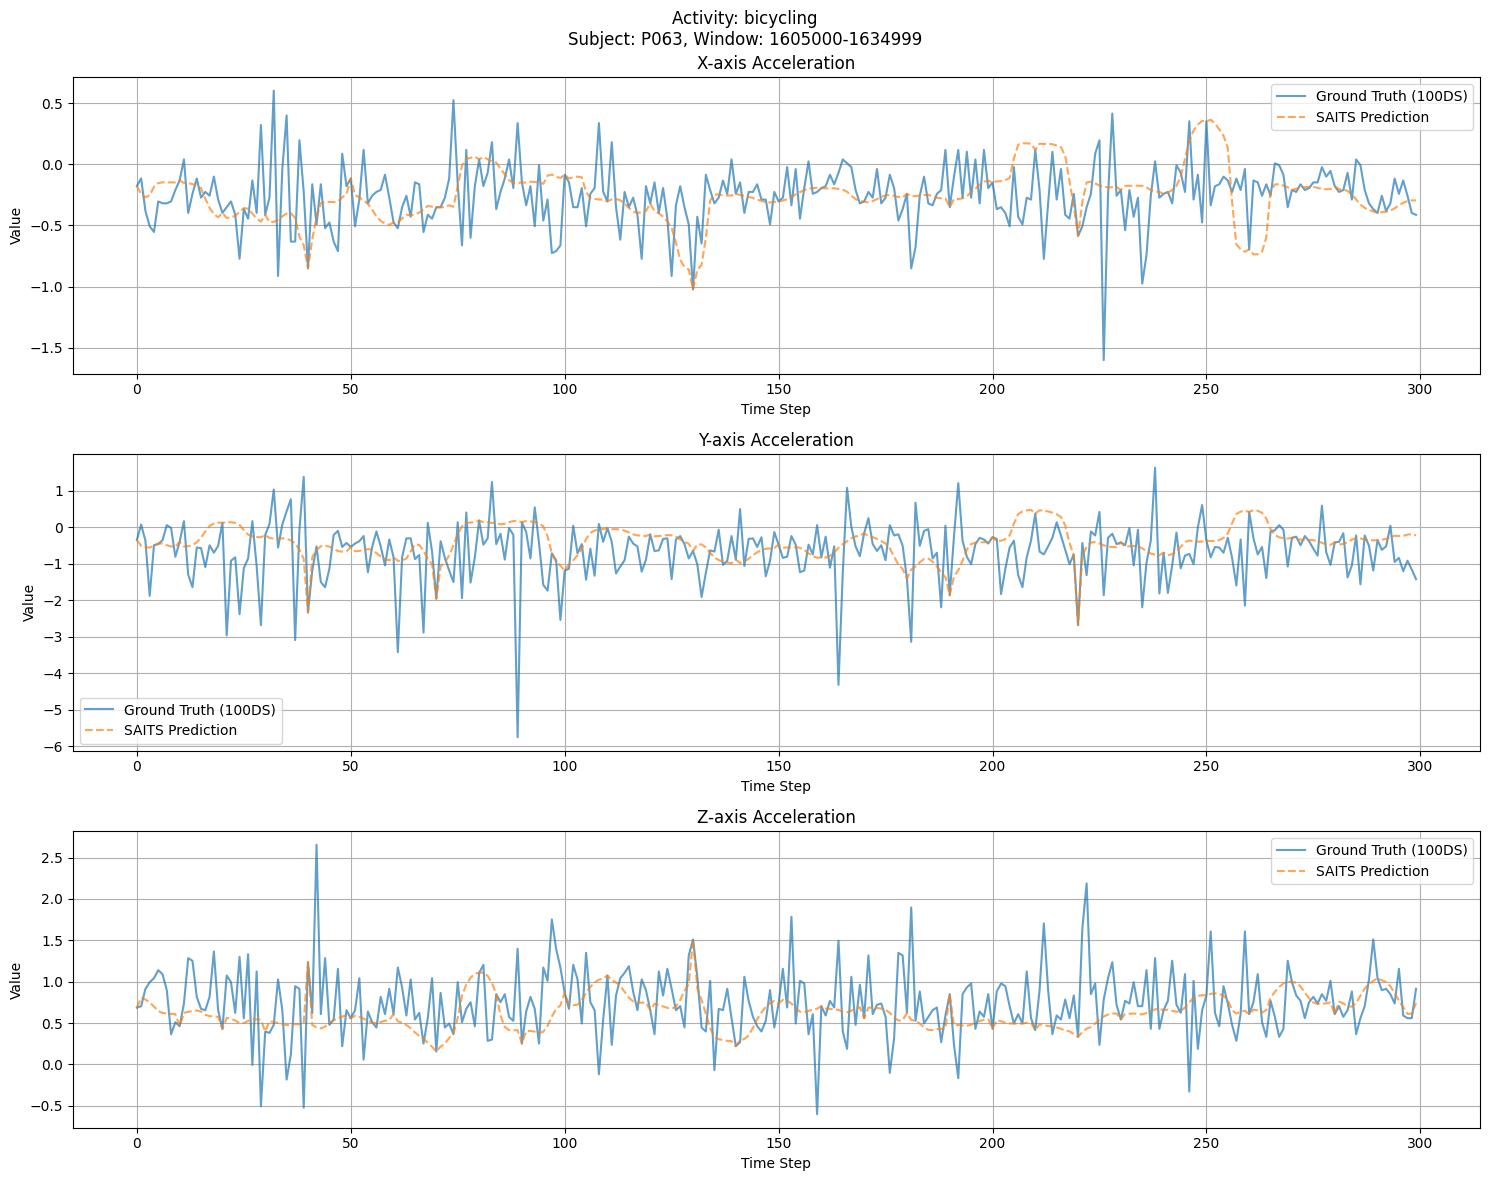


Sample 311 metrics:
Activity: bicycling
Subject: P063
MSE: 0.3681
MAE: 0.3730


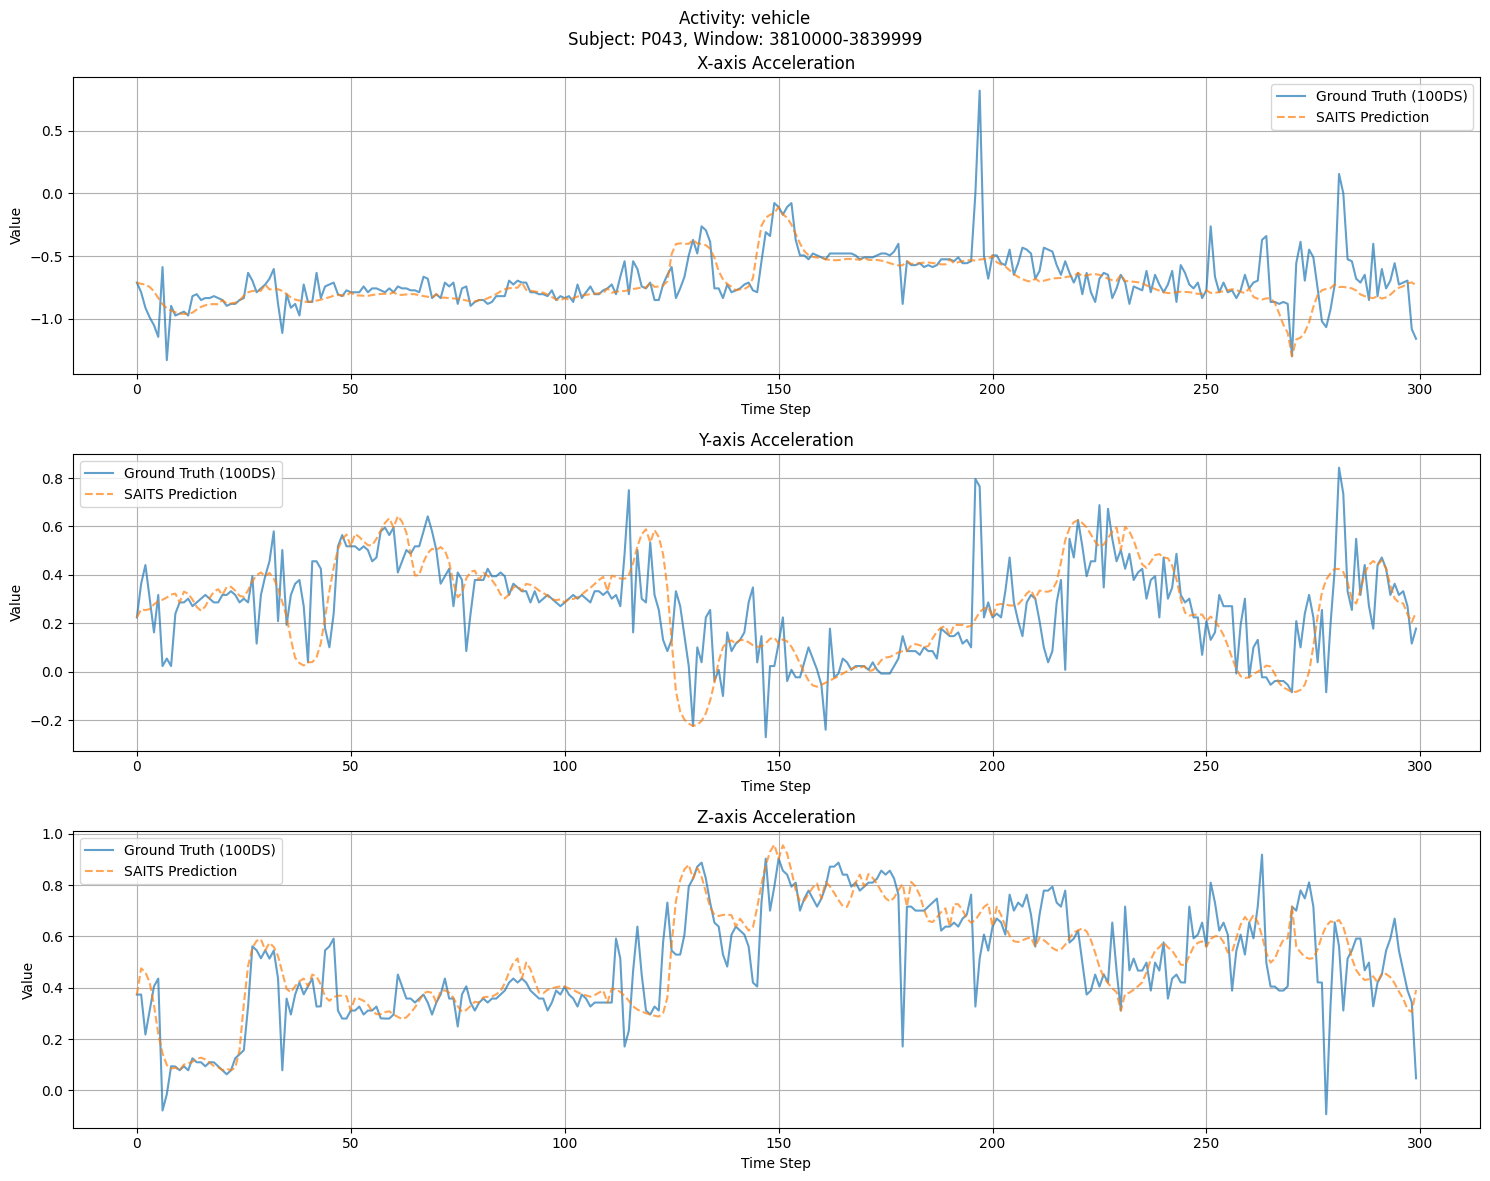


Sample 1566 metrics:
Activity: vehicle
Subject: P043
MSE: 0.0247
MAE: 0.0976


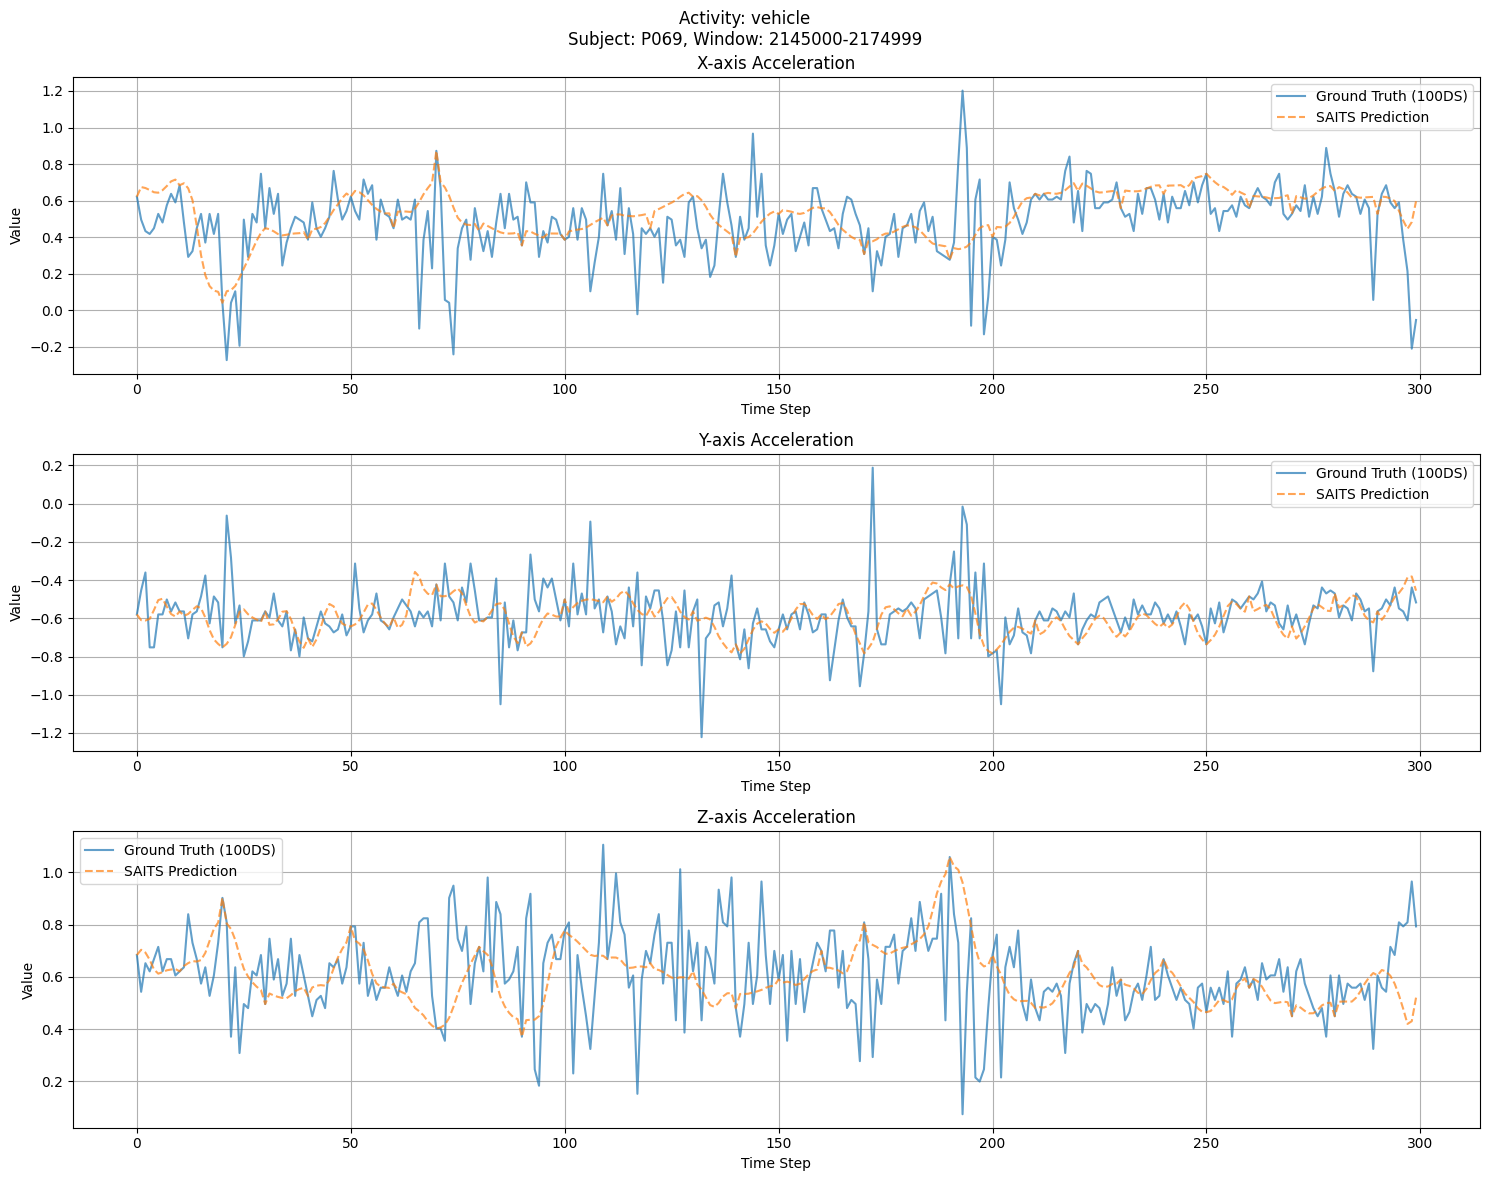


Sample 1888 metrics:
Activity: vehicle
Subject: P069
MSE: 0.0311
MAE: 0.1175


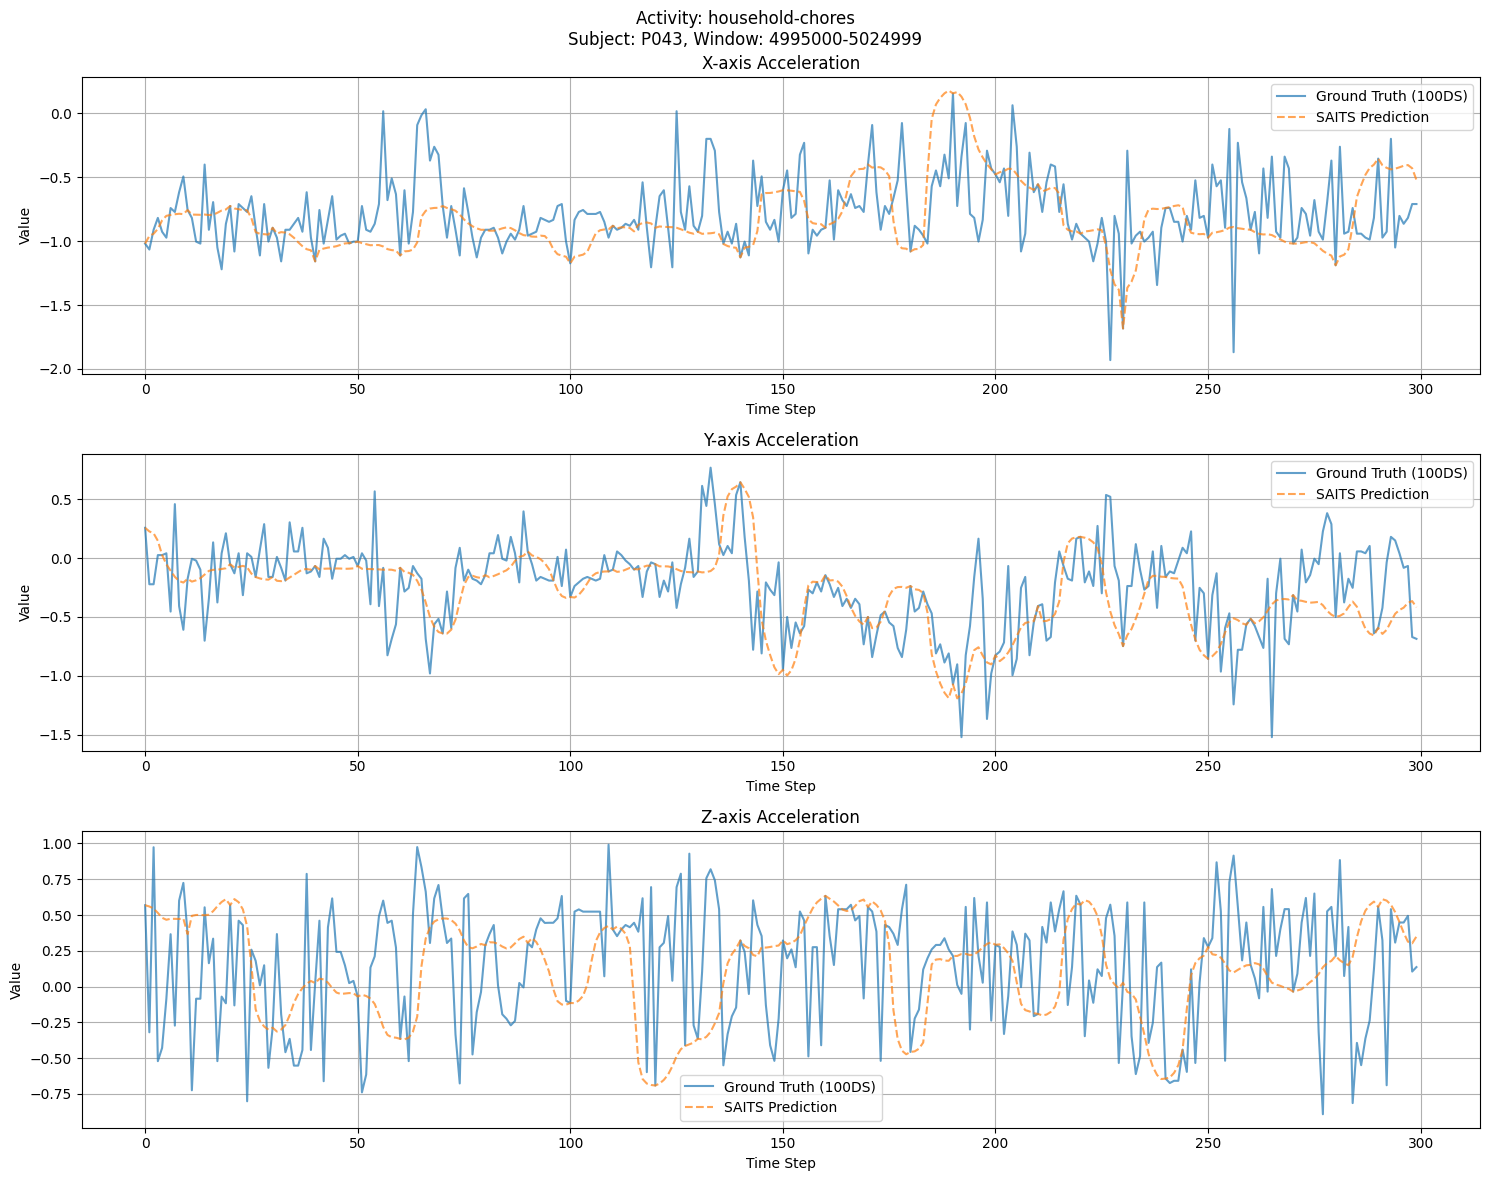


Sample 1641 metrics:
Activity: household-chores
Subject: P043
MSE: 0.1625
MAE: 0.2901


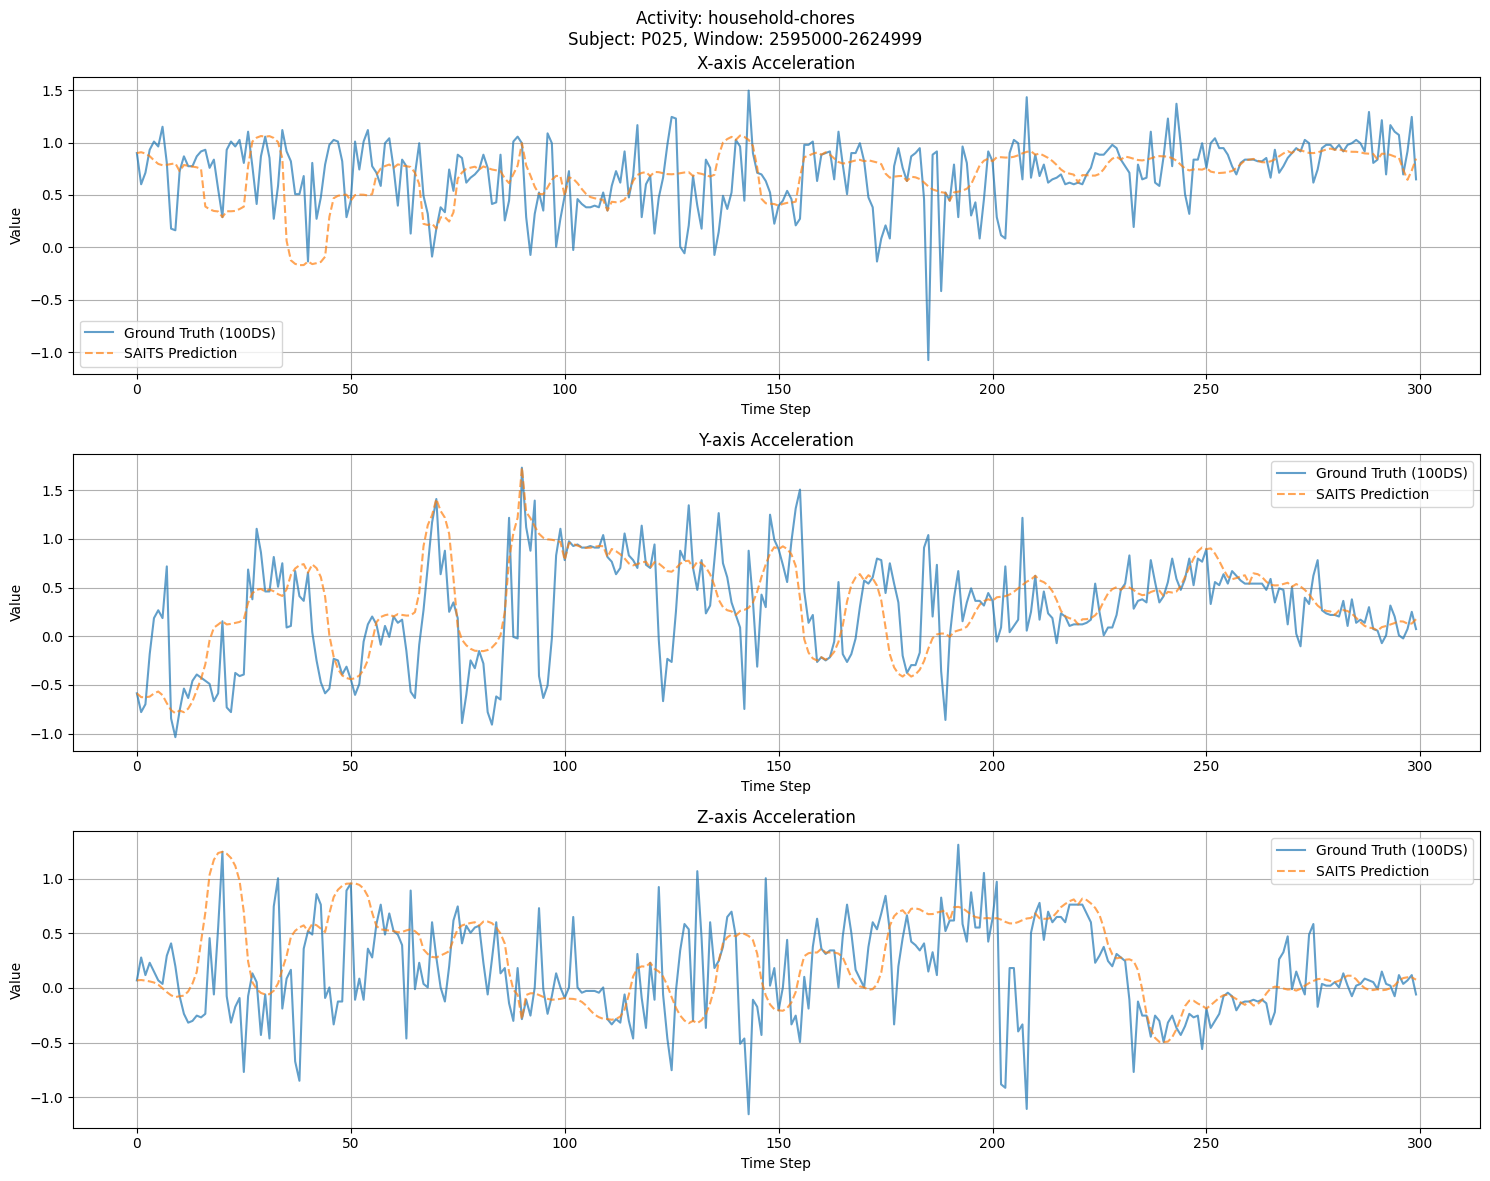


Sample 6434 metrics:
Activity: household-chores
Subject: P025
MSE: 0.1789
MAE: 0.2853


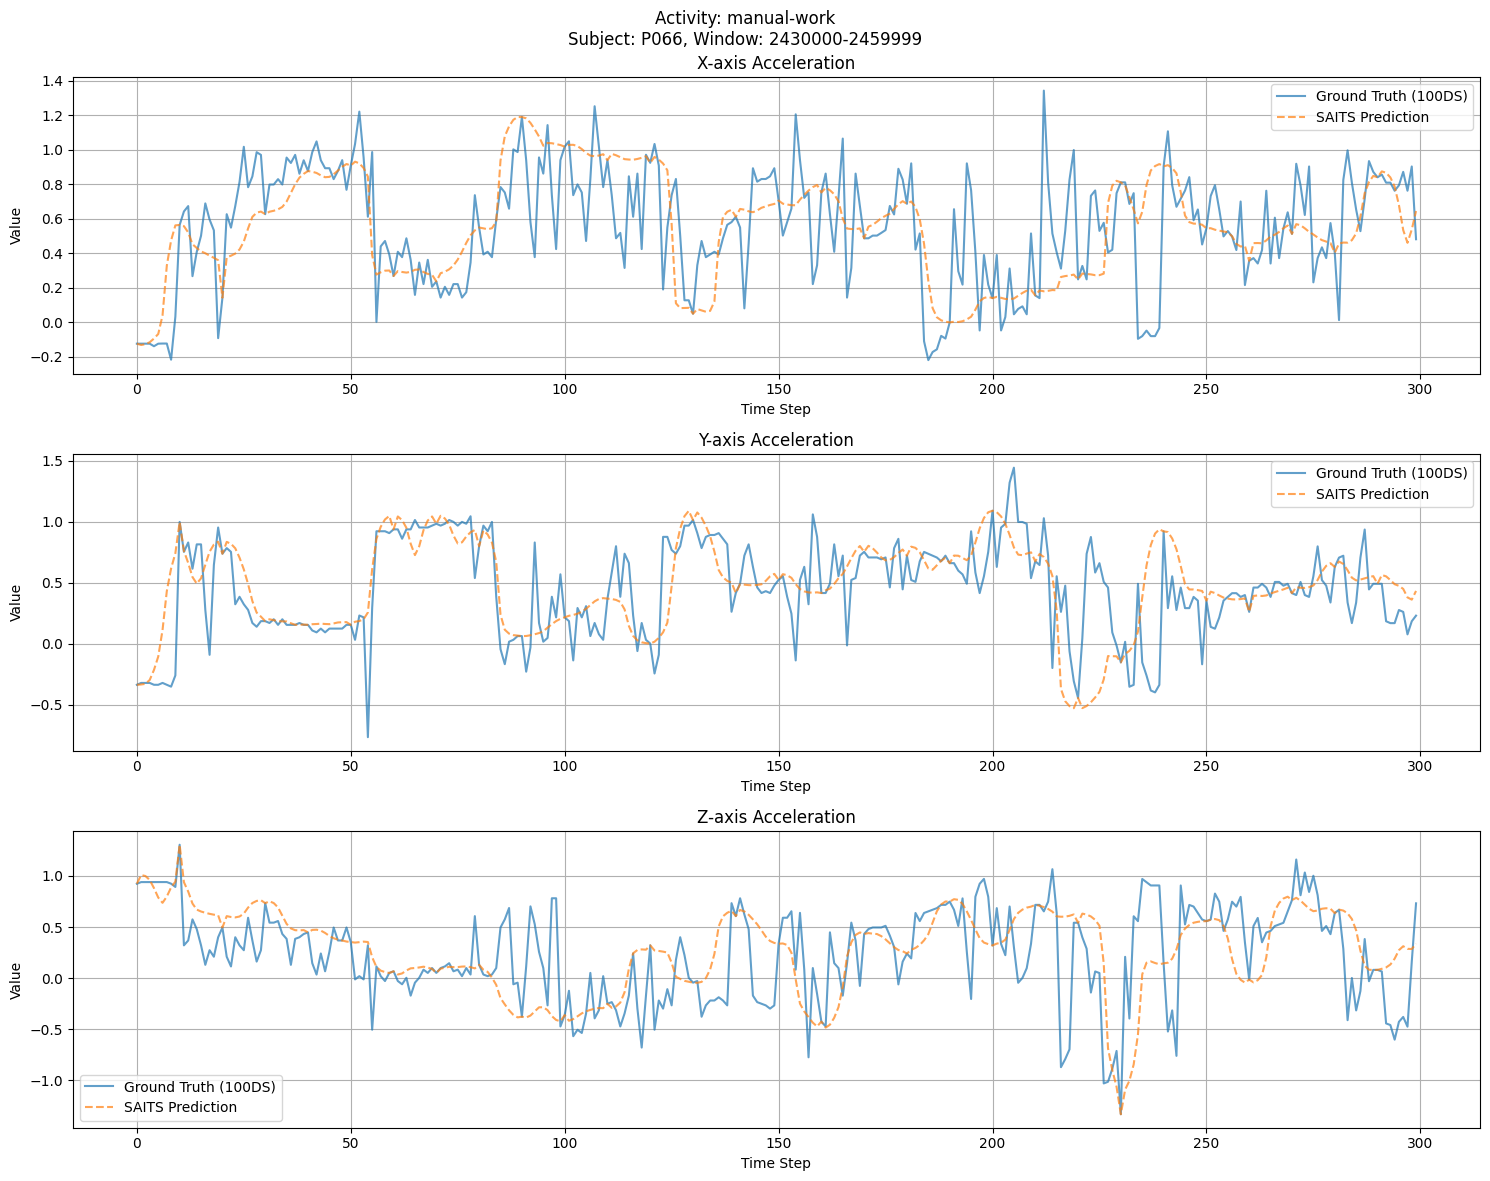


Sample 2258 metrics:
Activity: manual-work
Subject: P066
MSE: 0.1278
MAE: 0.2382


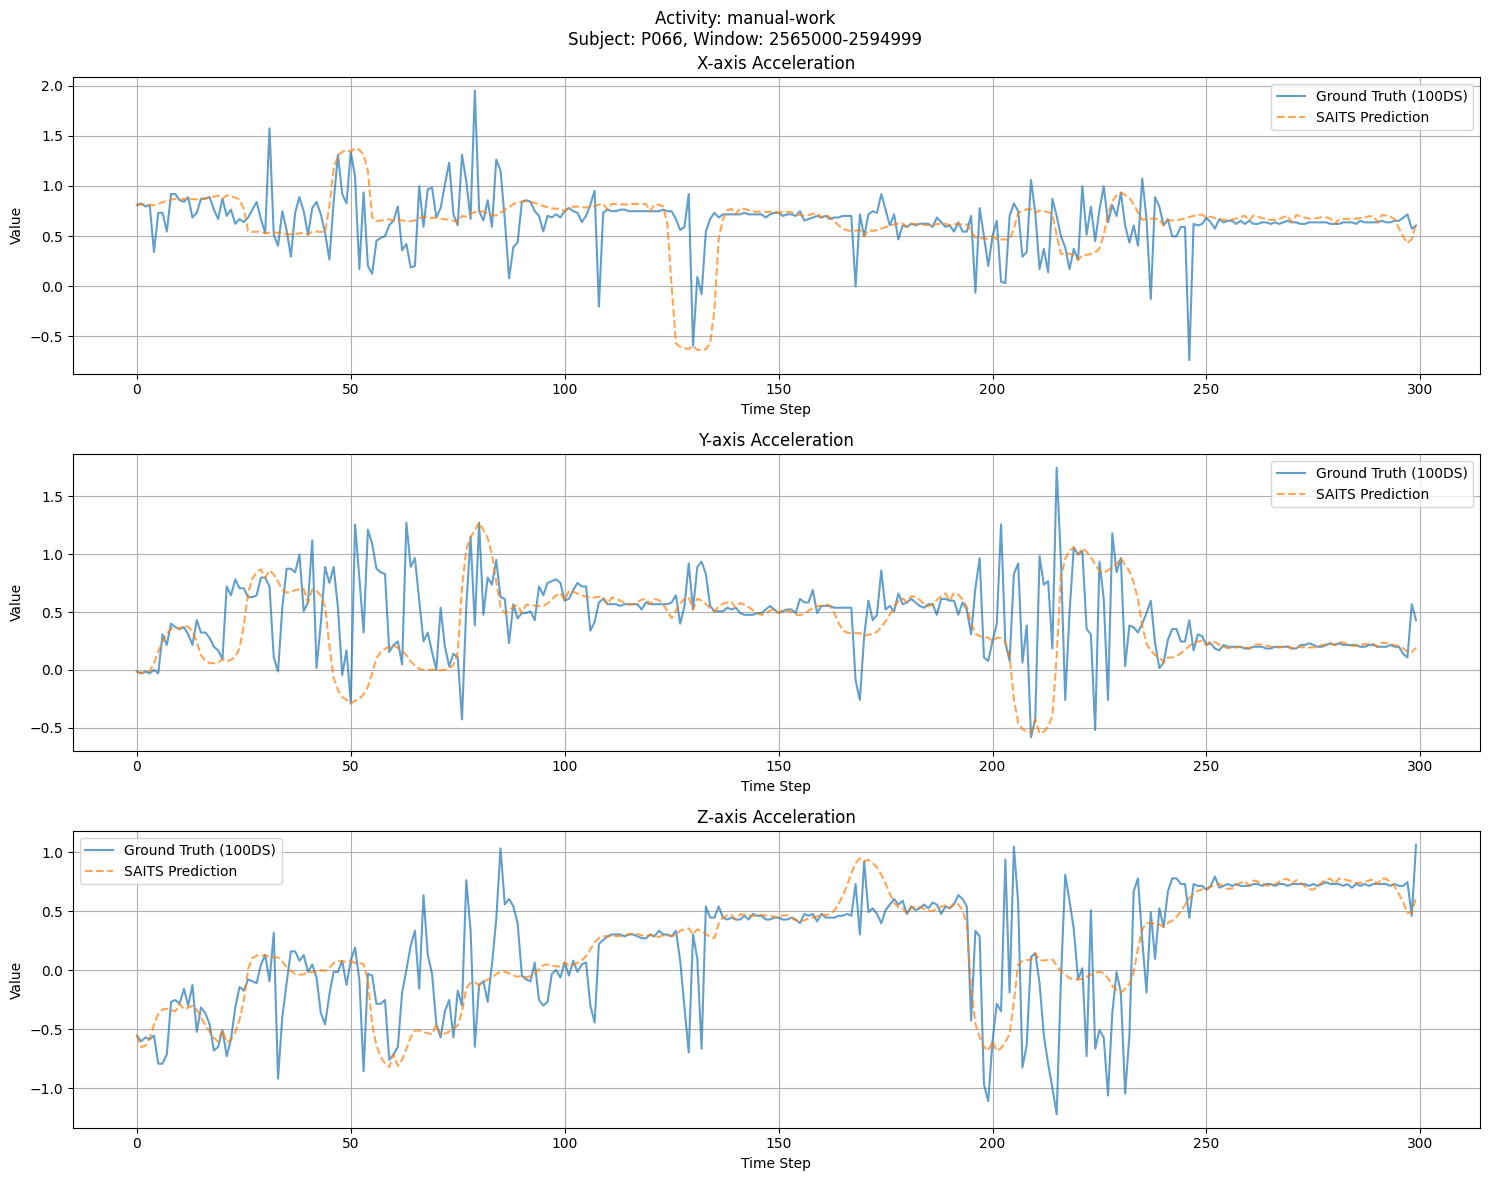


Sample 2267 metrics:
Activity: manual-work
Subject: P066
MSE: 0.1280
MAE: 0.2027


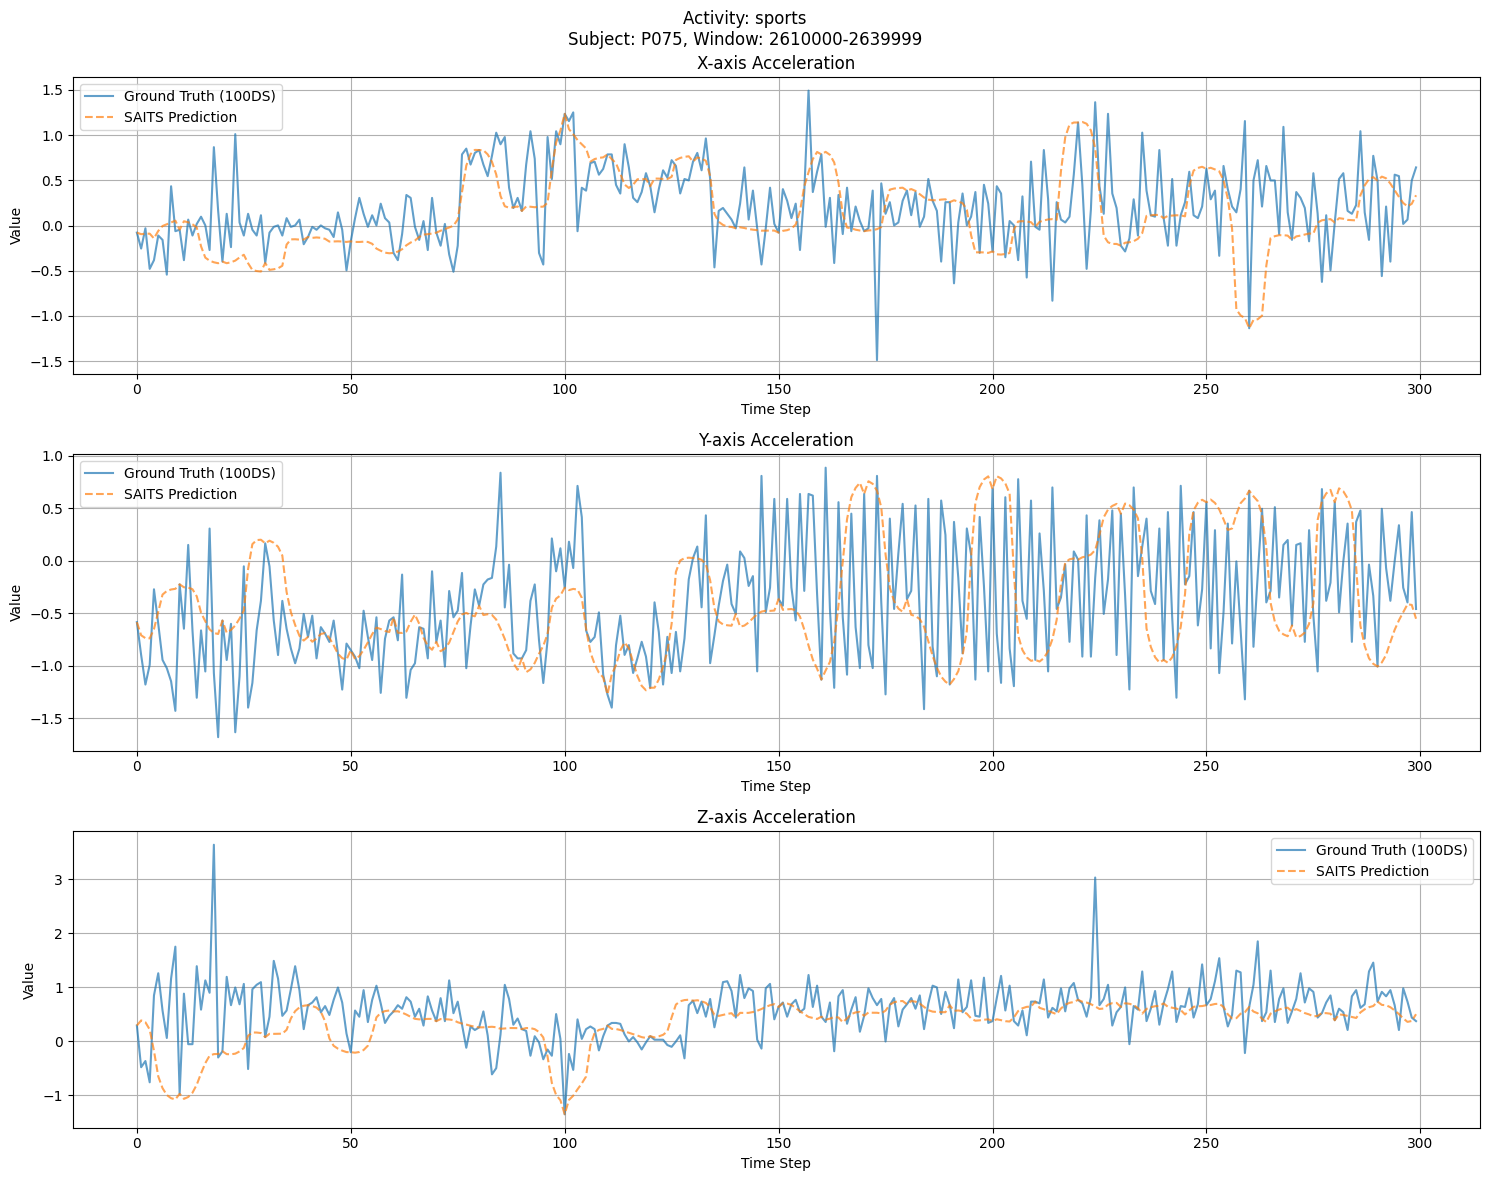


Sample 2788 metrics:
Activity: sports
Subject: P075
MSE: 0.3878
MAE: 0.4257


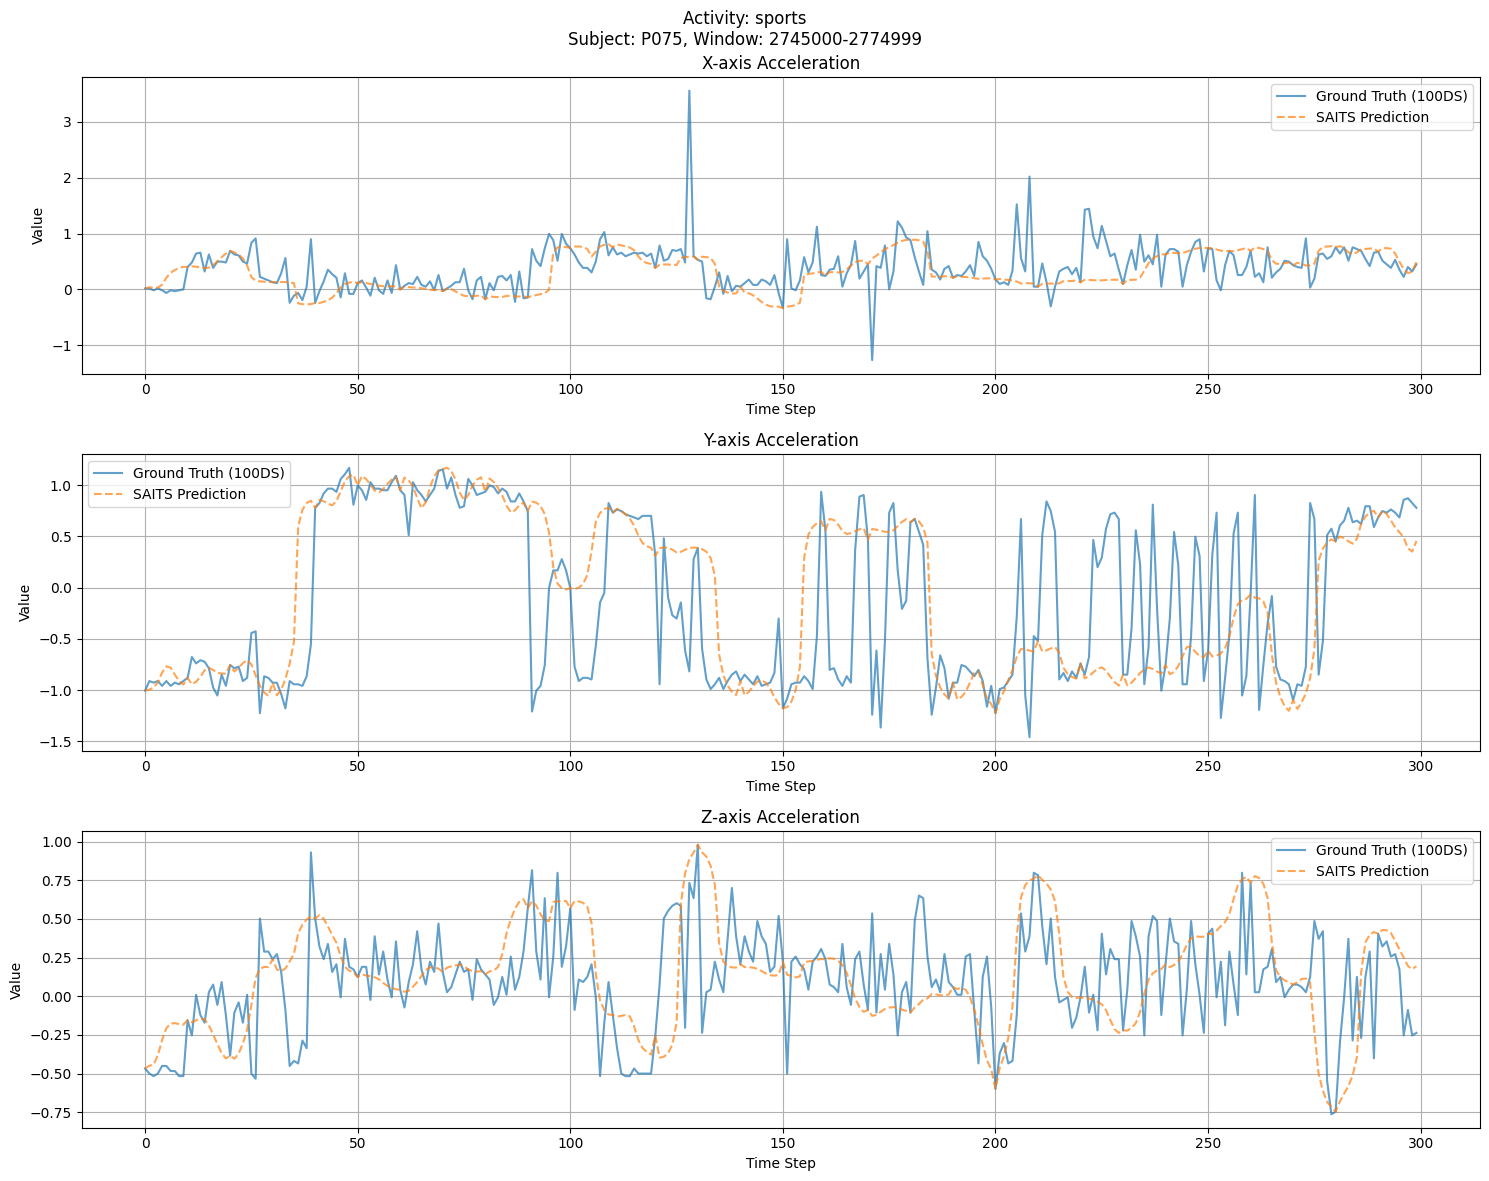


Sample 2797 metrics:
Activity: sports
Subject: P075
MSE: 0.2418
MAE: 0.3081


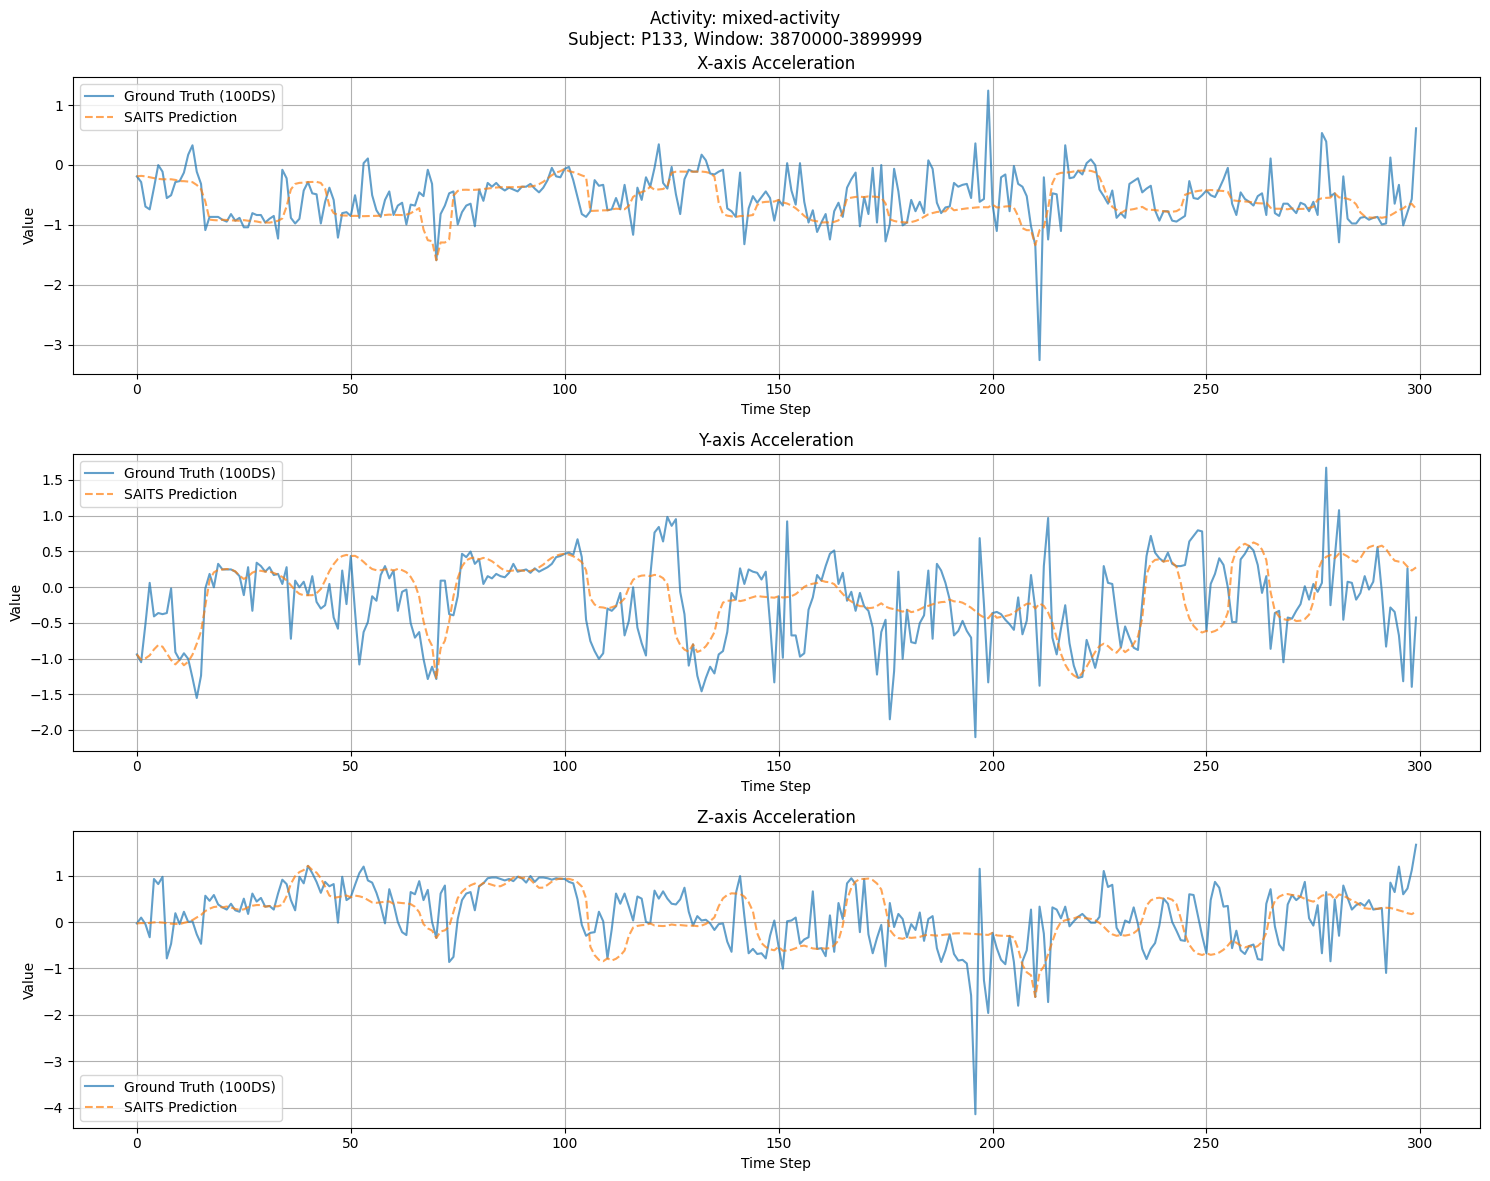


Sample 9389 metrics:
Activity: mixed-activity
Subject: P133
MSE: 0.2820
MAE: 0.3626


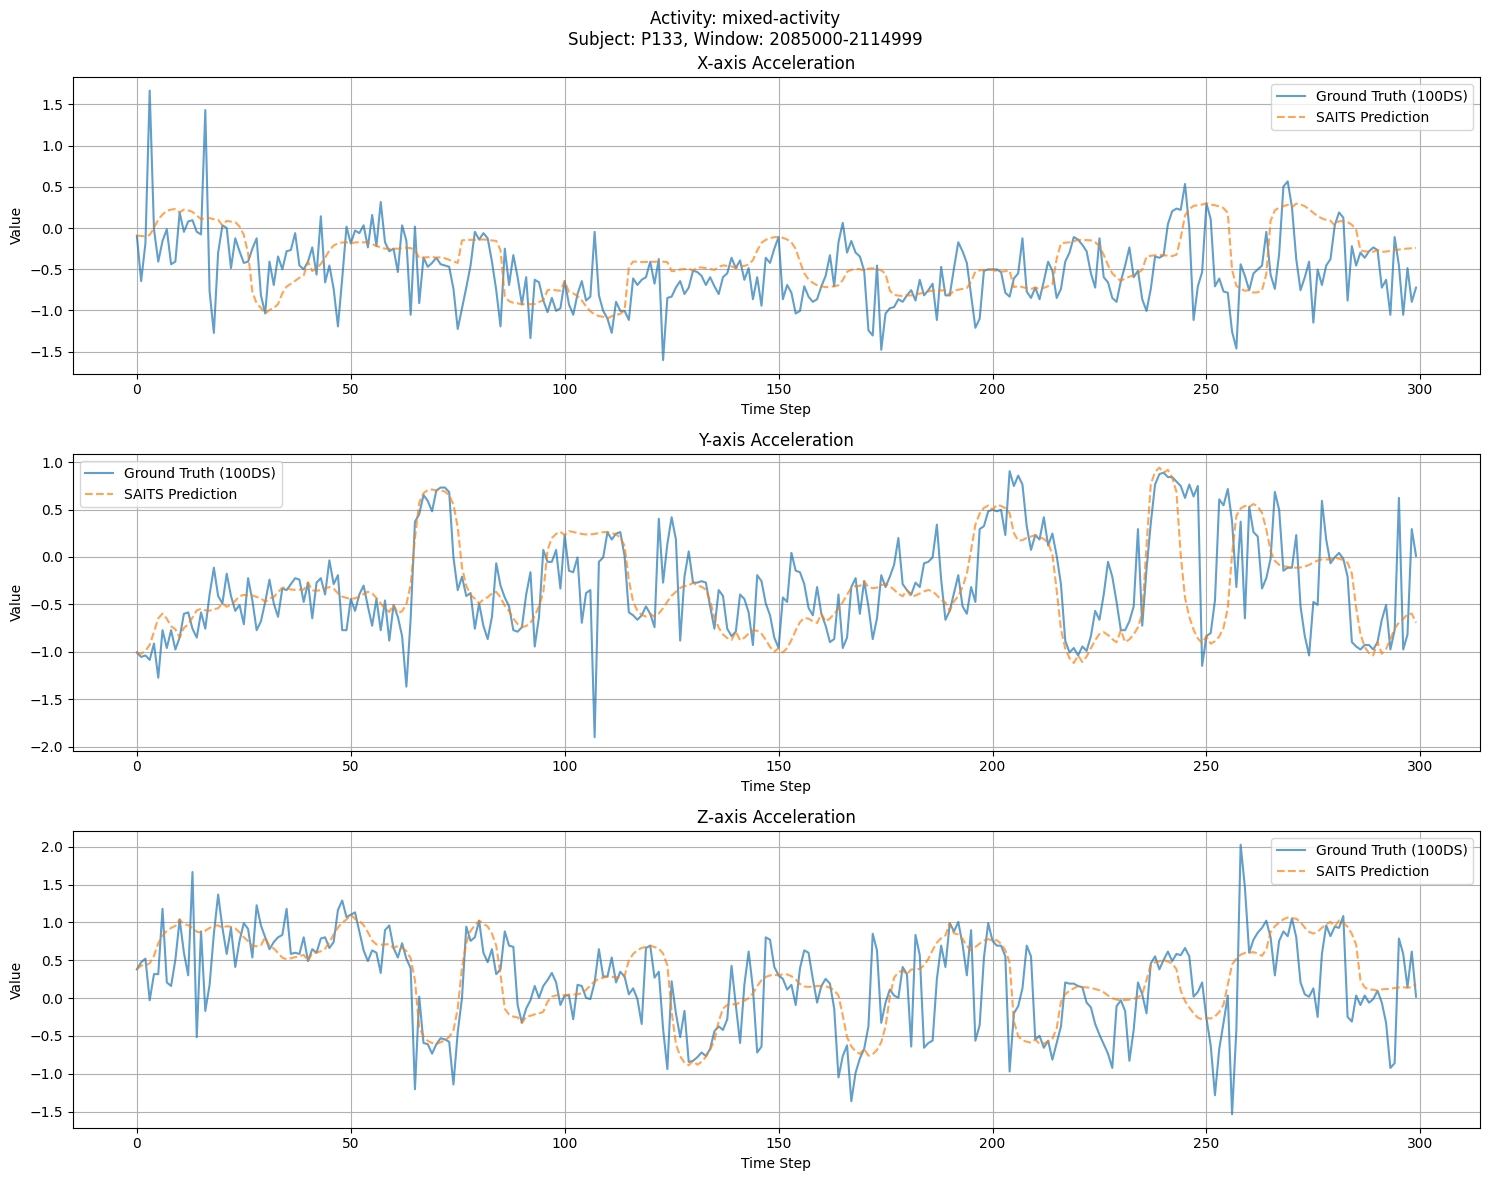


Sample 9270 metrics:
Activity: mixed-activity
Subject: P133
MSE: 0.2059
MAE: 0.3118


In [4]:
# Visualization functions
def plot_class_comparisons(high_res, pred_data, labels, n_samples_per_class=2):
    """
    Plot comparisons for each activity class
    Args:
        high_res: High resolution data (ground truth, 100DS)
        pred_data: SAITS predicted data
        labels: List of label dictionaries
        n_samples_per_class: Number of samples to plot for each class
    """
    # Extract activity categories
    activity_categories = np.array([label['activity_category'] for label in labels])
    unique_classes = sorted(np.unique(activity_categories))
    
    for class_idx in unique_classes:
        class_name = ACTIVITY_CLASSES[class_idx]
        class_samples = np.where(activity_categories == class_idx)[0]
        
        if len(class_samples) == 0:
            print(f"No samples found for class: {class_name}")
            continue
            
        # Select random samples for this class
        selected_samples = np.random.choice(class_samples, 
                                          size=min(n_samples_per_class, len(class_samples)), 
                                          replace=False)
        
        for sample_idx in selected_samples:
            # Get sample metadata
            sample_info = labels[sample_idx]
            subject = sample_info['subject']
            window_indices = sample_info['window_indices']
            
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
            fig.suptitle(f'Activity: {class_name}\nSubject: {subject}, Window: {window_indices[0]}-{window_indices[1]}')
            
            # Plot X-axis acceleration
            ax1.plot(high_res[sample_idx, :, 0], label='Ground Truth (100DS)', alpha=0.7)
            ax1.plot(pred_data[sample_idx, :, 0], label='SAITS Prediction', alpha=0.7, linestyle='--')
            ax1.set_title('X-axis Acceleration')
            ax1.set_xlabel('Time Step')
            ax1.set_ylabel('Value')
            ax1.legend()
            ax1.grid(True)
            
            # Plot Y-axis acceleration
            ax2.plot(high_res[sample_idx, :, 1], label='Ground Truth (100DS)', alpha=0.7)
            ax2.plot(pred_data[sample_idx, :, 1], label='SAITS Prediction', alpha=0.7, linestyle='--')
            ax2.set_title('Y-axis Acceleration')
            ax2.set_xlabel('Time Step')
            ax2.set_ylabel('Value')
            ax2.legend()
            ax2.grid(True)
            
            # Plot Z-axis acceleration
            ax3.plot(high_res[sample_idx, :, 2], label='Ground Truth (100DS)', alpha=0.7)
            ax3.plot(pred_data[sample_idx, :, 2], label='SAITS Prediction', alpha=0.7, linestyle='--')
            ax3.set_title('Z-axis Acceleration')
            ax3.set_xlabel('Time Step')
            ax3.set_ylabel('Value')
            ax3.legend()
            ax3.grid(True)
            
            plt.tight_layout()
            plt.show()
            
            # Calculate and print error metrics for this sample
            mse = mean_squared_error(high_res[sample_idx], pred_data[sample_idx])
            mae = mean_absolute_error(high_res[sample_idx], pred_data[sample_idx])
            print(f"\nSample {sample_idx} metrics:")
            print(f"Activity: {class_name}")
            print(f"Subject: {subject}")
            print(f"MSE: {mse:.4f}")
            print(f"MAE: {mae:.4f}")

# Plot comparisons for each activity class
np.random.seed(42)  # For reproducible sample selection
plot_class_comparisons(high_res_data, pred_data, test_labels)


In [ ]:
# Calculate statistics per activity class
def compute_class_statistics(high_res, pred_data, labels):
    activity_categories = np.array([label['activity_category'] for label in labels])
    unique_classes = sorted(np.unique(activity_categories))
    
    print("\nPer-class Statistics:")
    for cls in unique_classes:
        class_name = ACTIVITY_CLASSES[cls]
        class_samples = np.where(activity_categories == cls)[0]
        
        # Calculate metrics for this class
        class_mse = mean_squared_error(high_res[class_samples].flatten(), 
                                     pred_data[class_samples].flatten())
        class_mae = mean_absolute_error(high_res[class_samples].flatten(), 
                                      pred_data[class_samples].flatten())
        
        # Calculate max difference for this class
        max_diff = np.max(np.abs(high_res[class_samples] - pred_data[class_samples]))
        
        print(f"\nActivity: {class_name}")
        print(f"Number of samples: {len(class_samples)}")
        print(f"MSE: {class_mse:.6f}")
        print(f"MAE: {class_mae:.6f}")
        print(f"Max absolute difference: {max_diff:.6f}")

# Compute statistics
compute_class_statistics(high_res_data, pred_data, test_labels)


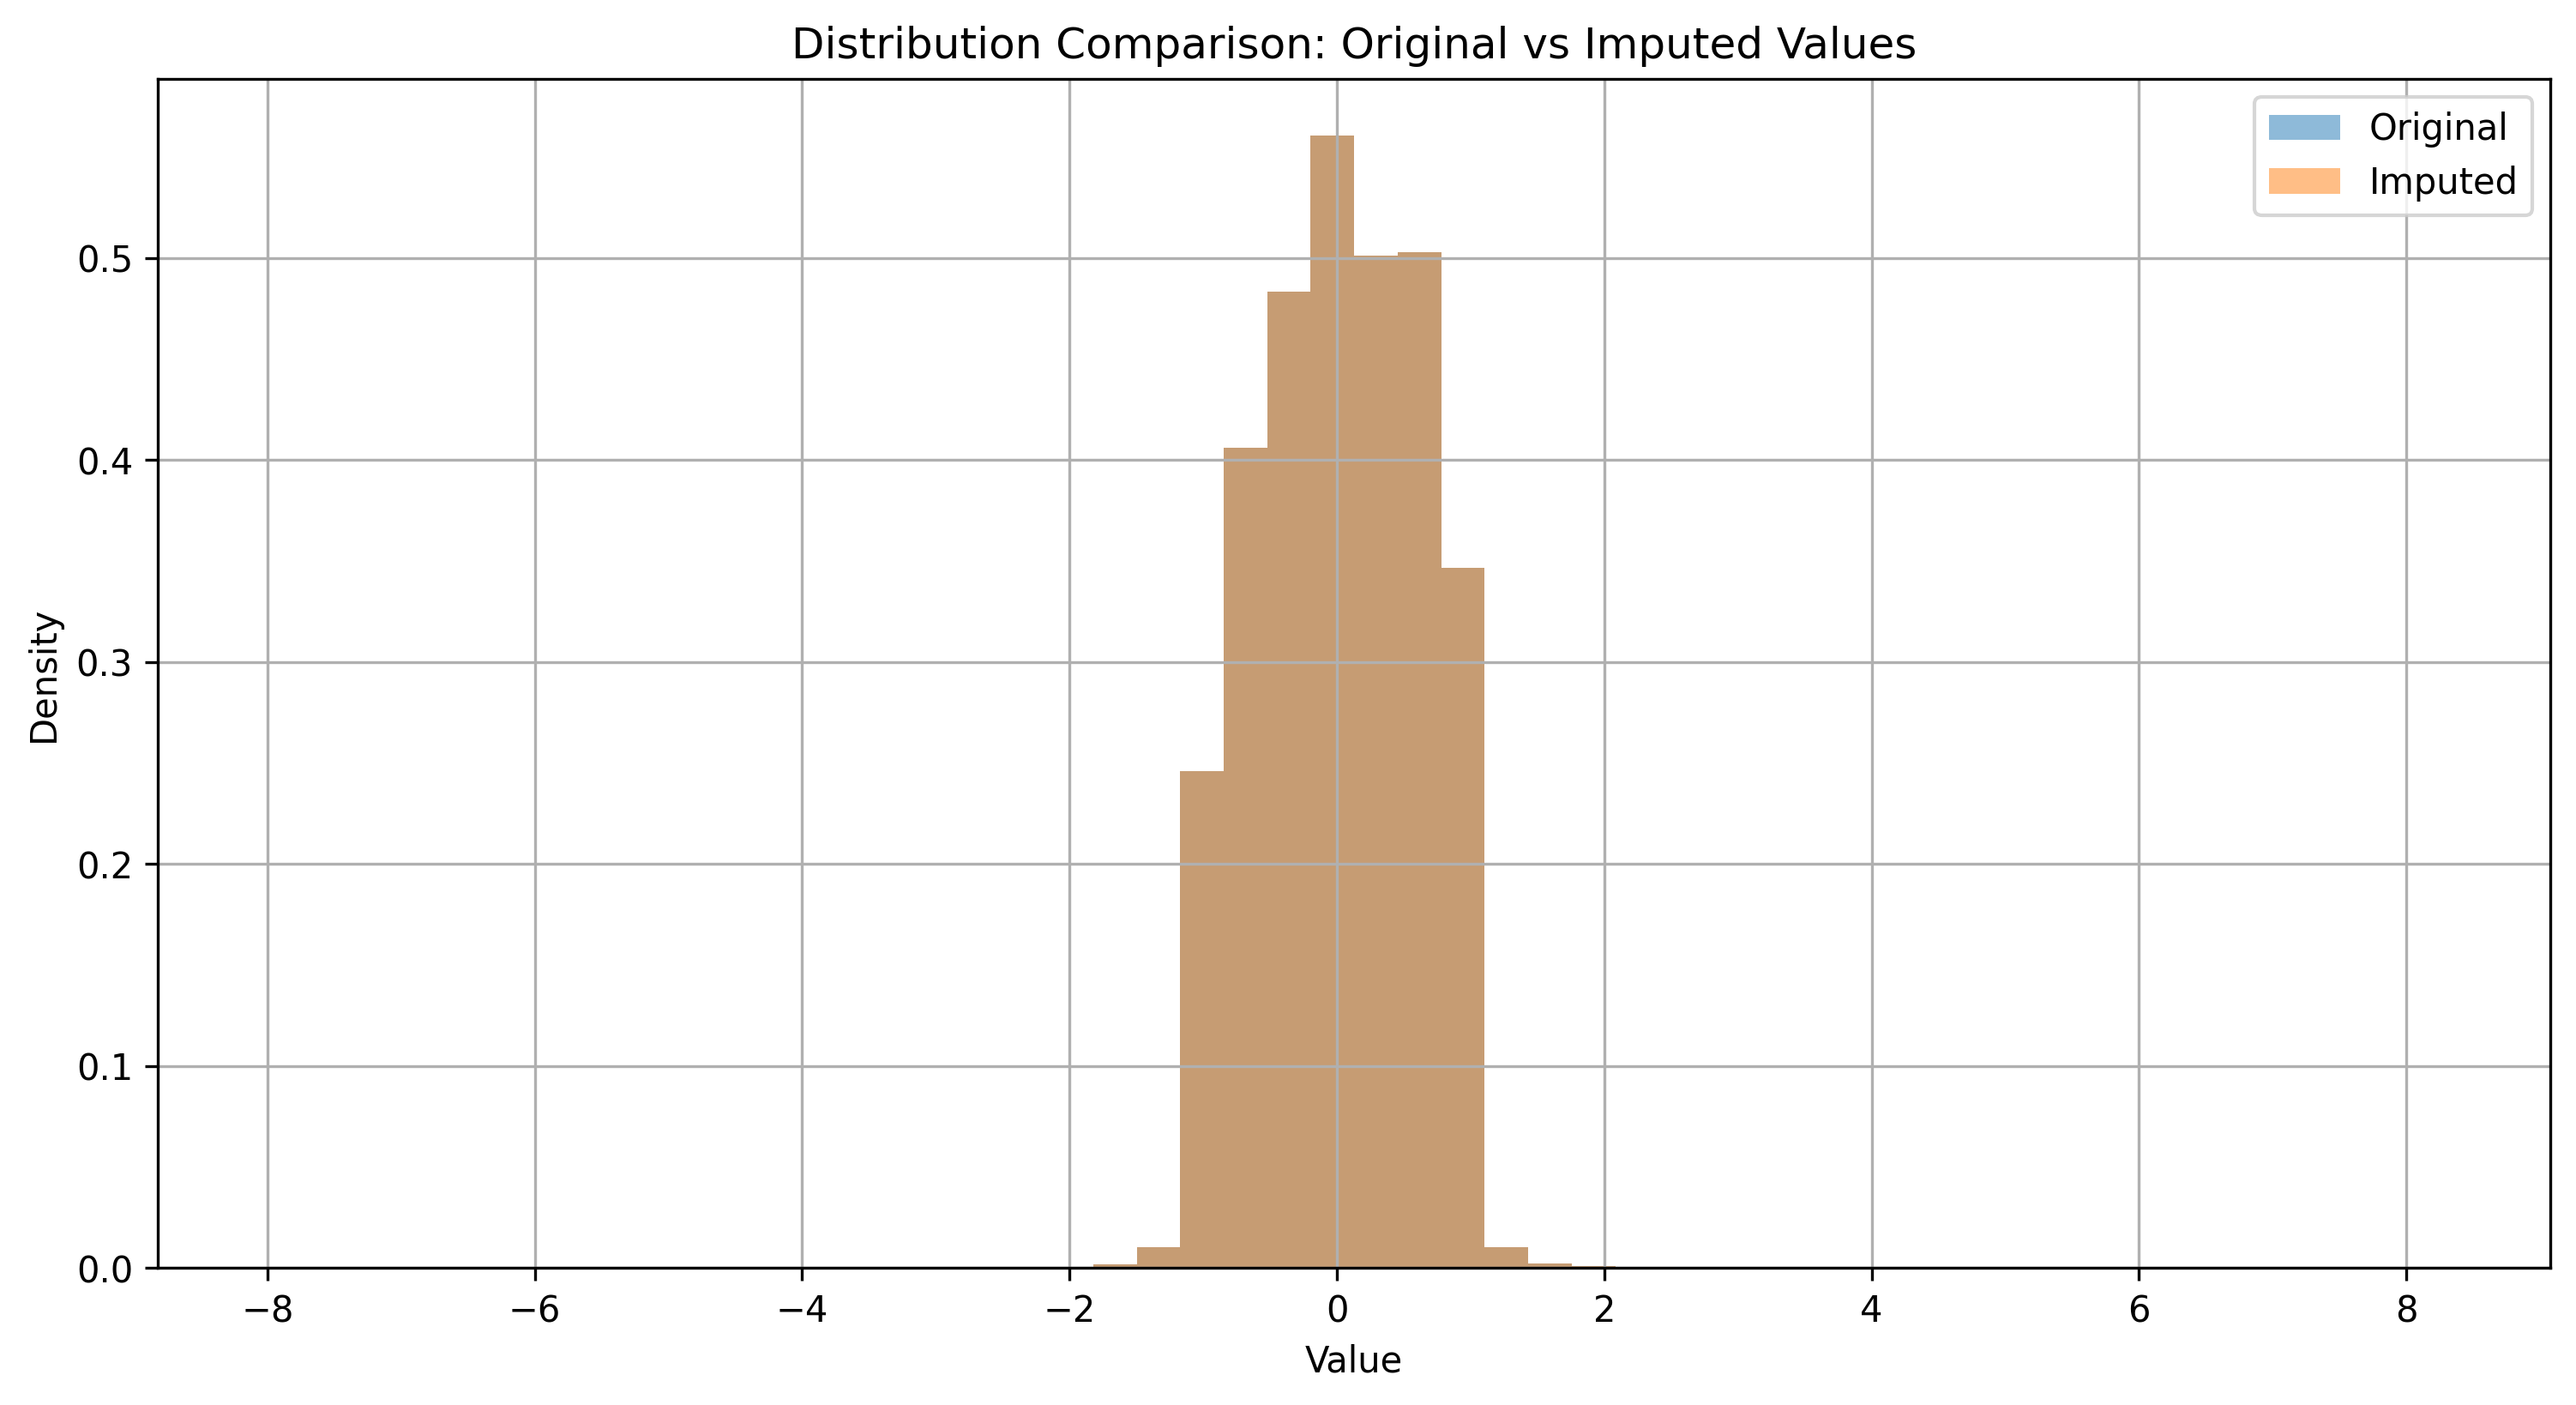


Distribution Statistics:
Original - Mean: 0.0233, Std: 0.5877
Imputed  - Mean: 0.0233, Std: 0.5877


In [30]:
# Distribution analysis
def plot_distribution_comparison(original, imputed):
    """
    Plot distribution comparison between original and imputed data
    """
    plt.figure(figsize=(12, 6))
    
    # Flatten arrays for distribution plotting
    orig_flat = original.flatten()
    imp_flat = imputed.flatten()
    
    # Plot histograms
    plt.hist(orig_flat, bins=50, alpha=0.5, label='Original', density=True)
    plt.hist(imp_flat, bins=50, alpha=0.5, label='Imputed', density=True)
    
    plt.title('Distribution Comparison: Original vs Imputed Values')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print basic statistics
    print("\nDistribution Statistics:")
    print(f"Original - Mean: {np.mean(orig_flat):.4f}, Std: {np.std(orig_flat):.4f}")
    print(f"Imputed  - Mean: {np.mean(imp_flat):.4f}, Std: {np.std(imp_flat):.4f}")

# Plot distribution comparison
plot_distribution_comparison(test_data, test_data)  # Replace second test_data with model predictions
